# <center> CAR PRICE PREDICTION

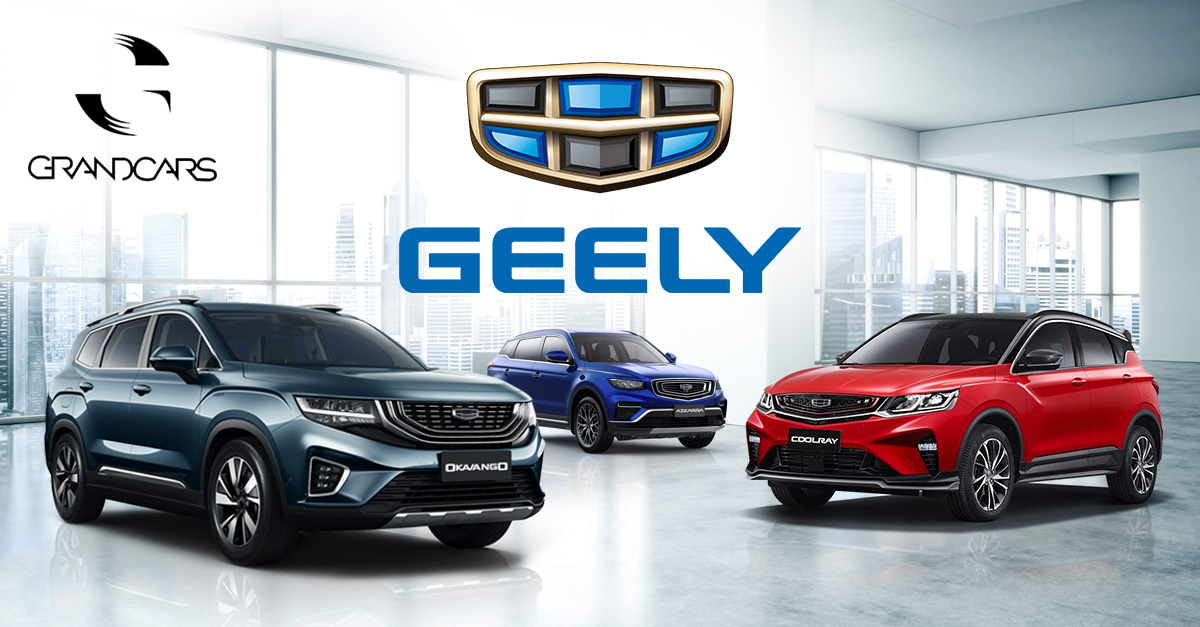

### Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

    - Which variables are significant in predicting the price of a car
    - How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Step 1: Looking and taking a quick look at the data

In [2]:
cars=pd.read_csv('CarPrice.csv')

In [3]:
cars.shape

(205, 26)

In [4]:
pd.set_option('display.max_columns',None)

In [5]:
cars.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
cars.isna().sum().sum()

0

No null in the dataset

In [8]:
cars.CarName.value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

There are 147 unique cars, which seems suspicious

In [9]:
'toyota corolla'.split(" ")

['toyota', 'corolla']

In [10]:
'alfa-romero giulia'.split(" ")

['alfa-romero', 'giulia']

Since there are no null in the dataset so we can directly jump into the data cleaning and preprocessing

### Step 2: Data cleaning and preprocessing

In [11]:
CompanyName=cars['CarName'].apply(lambda x :x.split(" ")[0])
cars.insert(3,'CompanyName',CompanyName)
cars.head()

car_ID  symboling                   CarName  CompanyName fueltype  \
0       1          3        alfa-romero giulia  alfa-romero      gas   
1       2          3       alfa-romero stelvio  alfa-romero      gas   
2       3          1  alfa-romero Quadrifoglio  alfa-romero      gas   
3       4          2               audi 100 ls         audi      gas   
4       5          2                audi 100ls         audi      gas   

  aspiration doornumber      carbody drivewheel enginelocation  wheelbase  \
0        std        two  convertible        rwd          front       88.6   
1        std        two  convertible        rwd          front       88.6   
2        std        two    hatchback        rwd          front       94.5   
3        std       four        sedan        fwd          front       99.8   
4        std       four        sedan        4wd          front       99.4   

   carlength  carwidth  carheight  curbweight enginetype cylindernumber  \
0      168.8      64.1       48.8        2548       dohc           four   
1      168.8      64.1       48.8        2548       dohc           four   
2      171.2      65.5       52.4        2823       ohcv            six   
3      176.6      66.2       54.3        2337        ohc           four   
4      176.6      66.4       54.3        2824        ohc           five   

   enginesize fuelsystem  boreratio  stroke  compressionratio  horsepower  \
0         130       mpfi       3.47    2.68               9.0         111   
1         130       mpfi       3.47    2.68               9.0         111   
2         152       mpfi       2.68    3.47               9.0         154   
3         109       mpfi       3.19    3.40              10.0         102   
4         136       mpfi       3.19    3.40               8.0         115   

   peakrpm  citympg  highwaympg    price  
0     5000       21          27  13495.0  
1     5000       21          27  16500.0  
2     5000       19          26  16500.0  
3     5500       24          30  13950.0  
4     5500       18          22  17450.0

In [12]:
cars=cars.drop(['CarName'],axis=1)
cars

car_ID  symboling  CompanyName fueltype aspiration doornumber  \
0         1          3  alfa-romero      gas        std        two   
1         2          3  alfa-romero      gas        std        two   
2         3          1  alfa-romero      gas        std        two   
3         4          2         audi      gas        std       four   
4         5          2         audi      gas        std       four   
..      ...        ...          ...      ...        ...        ...   
200     201         -1        volvo      gas        std       four   
201     202         -1        volvo      gas      turbo       four   
202     203         -1        volvo      gas        std       four   
203     204         -1        volvo   diesel      turbo       four   
204     205         -1        volvo      gas      turbo       four   

         carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0    convertible        rwd          front       88.6      168.8      64.1   
1    convertible        rwd          front       88.6      168.8      64.1   
2      hatchback        rwd          front       94.5      171.2      65.5   
3          sedan        fwd          front       99.8      176.6      66.2   
4          sedan        4wd          front       99.4      176.6      66.4   
..           ...        ...            ...        ...        ...       ...   
200        sedan        rwd          front      109.1      188.8      68.9   
201        sedan        rwd          front      109.1      188.8      68.8   
202        sedan        rwd          front      109.1      188.8      68.9   
203        sedan        rwd          front      109.1      188.8      68.9   
204        sedan        rwd          front      109.1      188.8      68.9   

     carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0         48.8        2548       dohc           four         130       mpfi   
1         48.8        2548       dohc           four         130       mpfi   
2         52.4        2823       ohcv            six         152       mpfi   
3         54.3        2337        ohc           four         109       mpfi   
4         54.3        2824        ohc           five         136       mpfi   
..         ...         ...        ...            ...         ...        ...   
200       55.5        2952        ohc           four         141       mpfi   
201       55.5        3049        ohc           four         141       mpfi   
202       55.5        3012       ohcv            six         173       mpfi   
203       55.5        3217        ohc            six         145        idi   
204       55.5        3062        ohc           four         141       mpfi   

     boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0         3.47    2.68               9.0         111     5000       21   
1         3.47    2.68               9.0         111     5000       21   
2         2.68    3.47               9.0         154     5000       19   
3         3.19    3.40              10.0         102     5500       24   
4         3.19    3.40               8.0         115     5500       18   
..         ...     ...               ...         ...      ...      ...   
200       3.78    3.15               9.5         114     5400       23   
201       3.78    3.15               8.7         160     5300       19   
202       3.58    2.87               8.8         134     5500       18   
203       3.01    3.40              23.0         106     4800       26   
204       3.78    3.15               9.5         114     5400       19   

     highwaympg    price  
0            27  13495.0  
1            27  16500.0  
2            26  16500.0  
3            30  13950.0  
4            22  17450.0  
..          ...      ...  
200          28  16845.0  
201          25  19045.0  
202          23  21485.0  
203          27  22470.0  
204          25  22625.0  

[205 rows x 26 columns]

In [13]:
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Still there are some issues

##### Fixing invalid values
- There seems to be some spelling error in the CompanyName column.

    - `maxda` = `mazda`
    - `Nissan` = `nissan`
    - `porsche` = `porcshce`
    - `toyota` = `toyouta`
    - `vokswagen` = `volkswagen` =  `vw`

In [14]:
cars.CompanyName=cars.CompanyName.str.lower()
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [15]:
cars.CompanyName=cars.CompanyName.replace(to_replace={'maxda':'mazda',
                                    'porcshce':'porsche',
                                    'toyouta':'toyota',
                                    'vokswagen':'volkswagen',
                                    'vw':'volkswagen'})

In [16]:
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [17]:
len(cars.CompanyName.unique())

22

In [18]:
cars.CompanyName.value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: CompanyName, dtype: int64

In [19]:
cars.duplicated().sum()

0

No duplicates in the entire data

### Step 3 : Visualizing the data

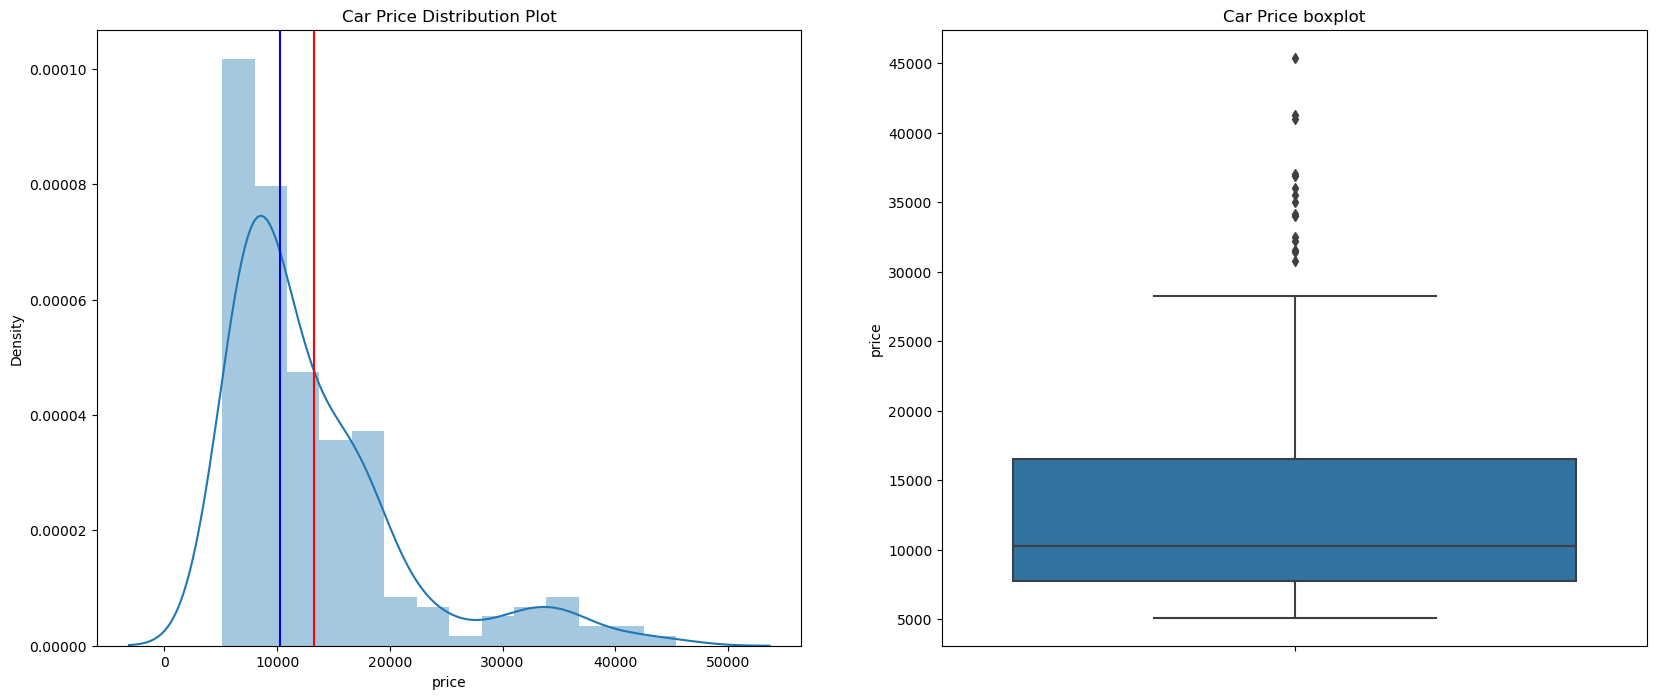

In [20]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars.price)
plt.axvline(cars.price.mean(),color='red')
plt.axvline(cars.price.median(),color='blue')


plt.subplot(1,2,2)
plt.title("Car Price boxplot")
sns.boxplot(y=cars.price);

In [21]:
cars.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

We can ee that top 25% has high variance 

In [22]:
cars.price.describe(percentiles=[0.25,0.50,0.75,0.85,0.90,1])

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64

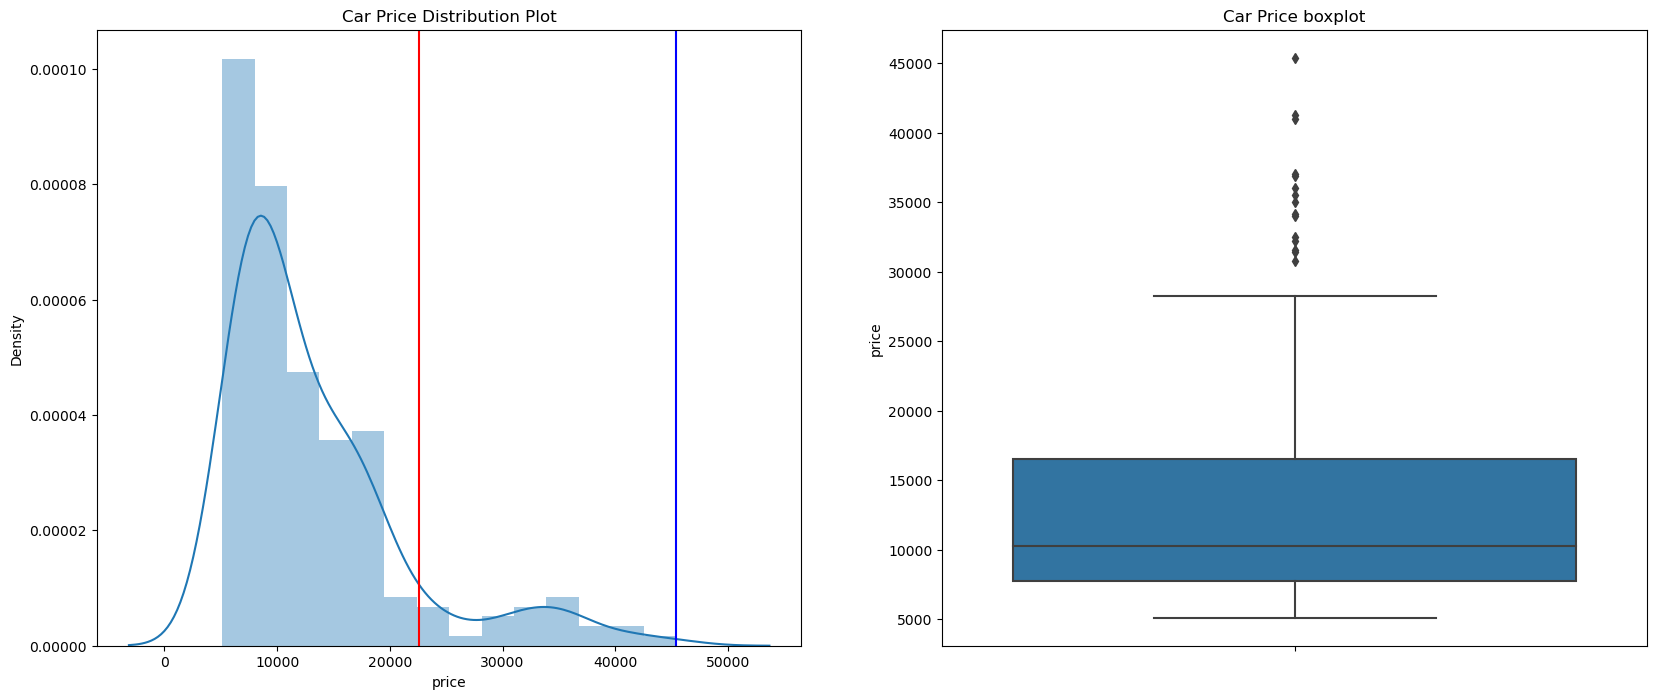

In [23]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars.price)
plt.axvline(cars.price.quantile(0.9),color='red')
plt.axvline(cars.price.quantile(1),color='blue')


plt.subplot(1,2,2)
plt.title("Car Price boxplot")
sns.boxplot(y=cars.price);

**Inference**
1. The plot seems to be right-skewed ,meaning that the most prices in the dataset are below 15000(can be confirmed from the box plot)
2. There is a significane difference between the mean and the median of the price distribution
3. The data point are far spread out from the mean,which indicates a high variance in the car prices .(85% of the prices are below 18,500 whereas the remaining 15% are between 18,500 and 45,400)

#### STEPS 3.1 : Visualising Categorical data

In [24]:
cars.columns[cars.dtypes=='object']

Index(['CompanyName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [25]:
cars.CompanyName.value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: CompanyName, dtype: int64

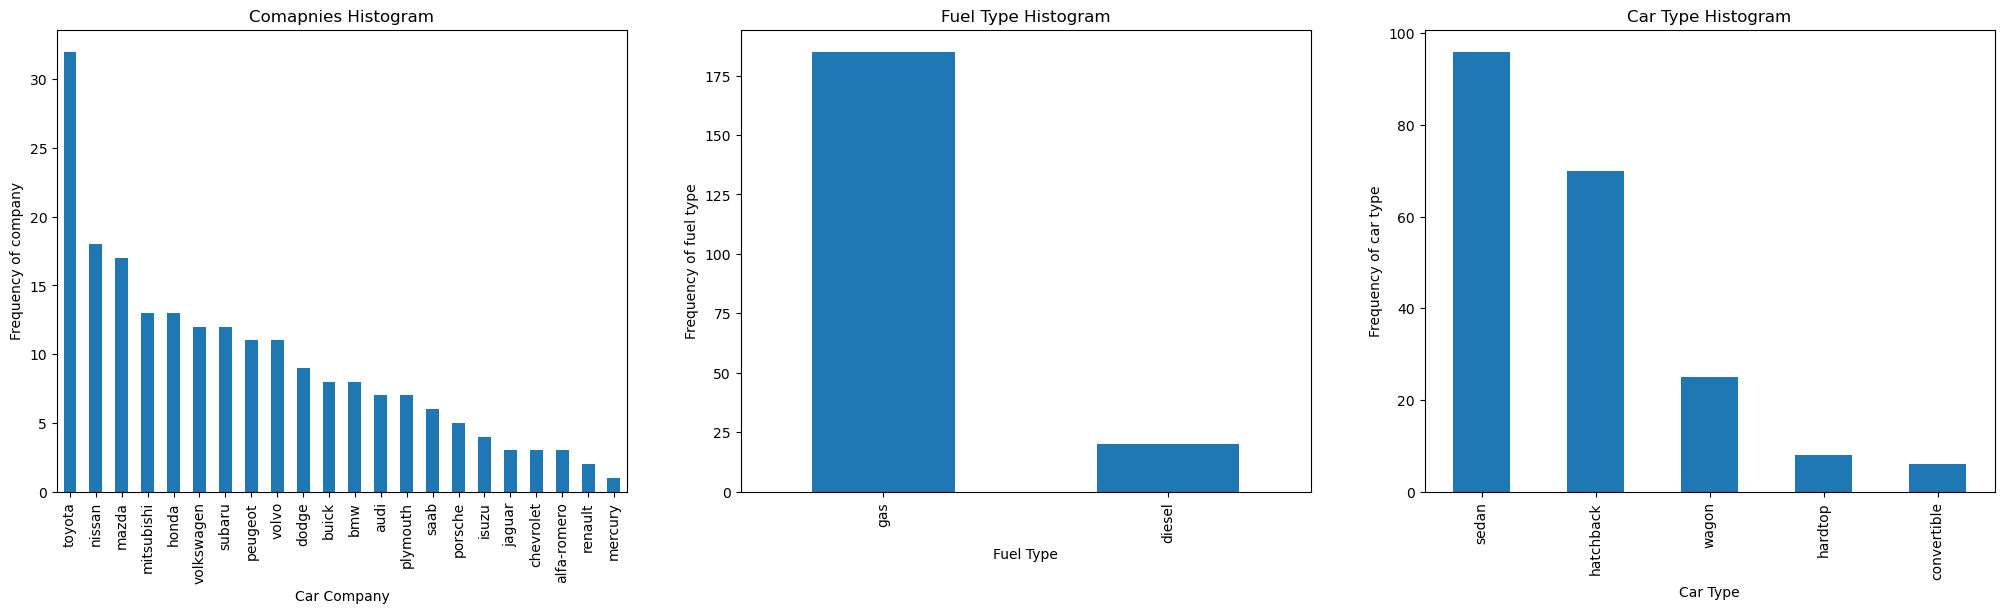

In [26]:
plt.figure(figsize=(25,6))

plt.subplot(1,3,1)
plt1=cars.CompanyName.value_counts().plot(kind='bar')
plt.title("Comapnies Histogram")
plt.xlabel("Car Company")
plt.ylabel("Frequency of company")

plt.subplot(1,3,2)
plt2=cars.fueltype.value_counts().plot(kind='bar')
plt.title("Fuel Type Histogram")
plt.xlabel("Fuel Type")
plt.ylabel("Frequency of fuel type")

plt.subplot(1,3,3)
plt3=cars.carbody.value_counts().plot(kind='bar')
plt.title("Car Type Histogram")
plt.xlabel("Car Type")
plt.ylabel("Frequency of car type");

#### Inference :

    1. `Toyota` seems to be favored car company
    2. Number of `gas` fueled cars are more than `diesel`.
    3. `sedan` is the top car type preferd.

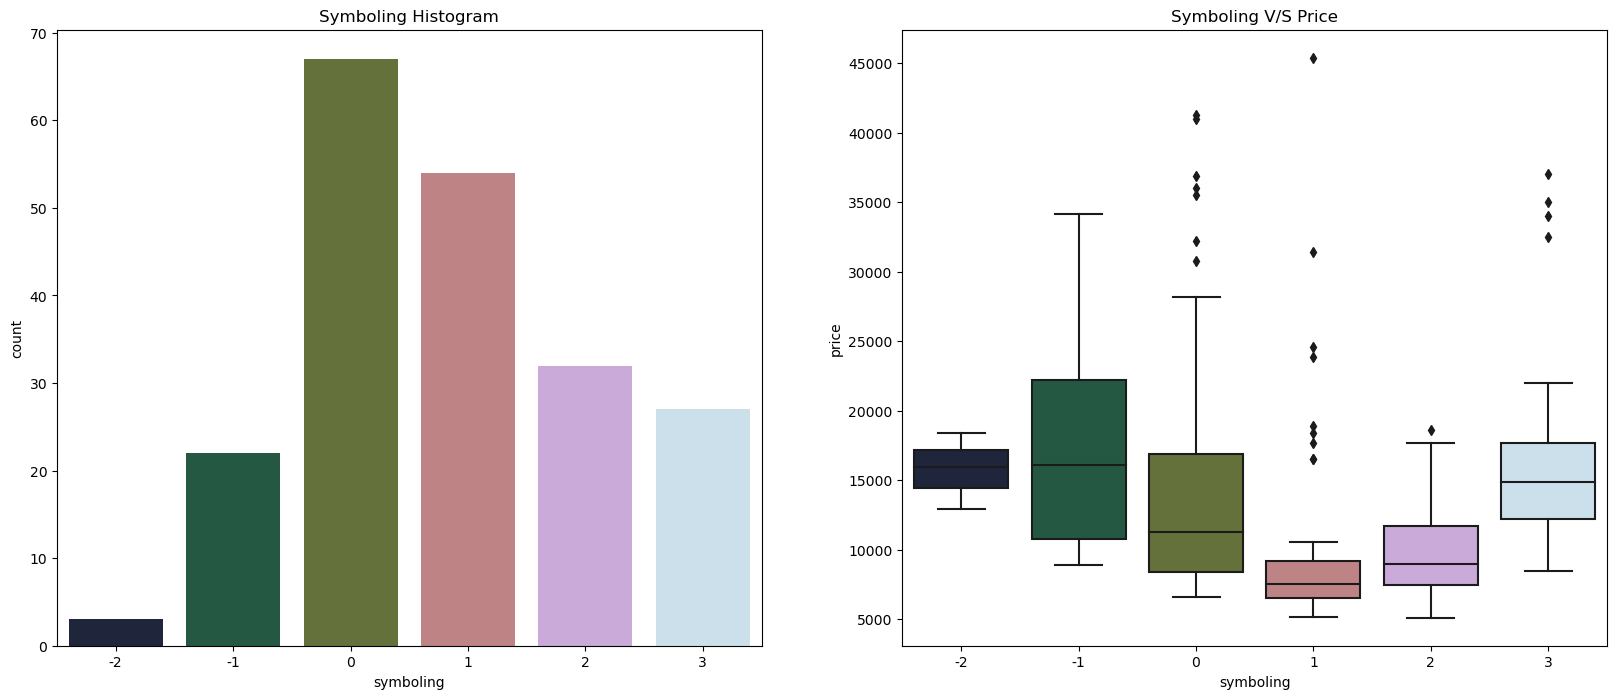

In [27]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title("Symboling Histogram")
sns.countplot(cars.symboling,palette='cubehelix')

plt.subplot(1,2,2)
plt.title("Symboling V/S Price")
sns.boxplot(x=cars.symboling,y=cars.price,palette='cubehelix');

#### Inference :
    
   1. It seems that the symboling with `0` and `1` values have high number of rows(i,e they are most sold)
   2. The cars with `-1` symboling seems to be high priced( as it makes sense too , as its insurance risk 
        rating -1 is very good).But it seems that symboling with `3` value has the price range similar to `-2` 
    value.There is a dip in price at symboling `1`.

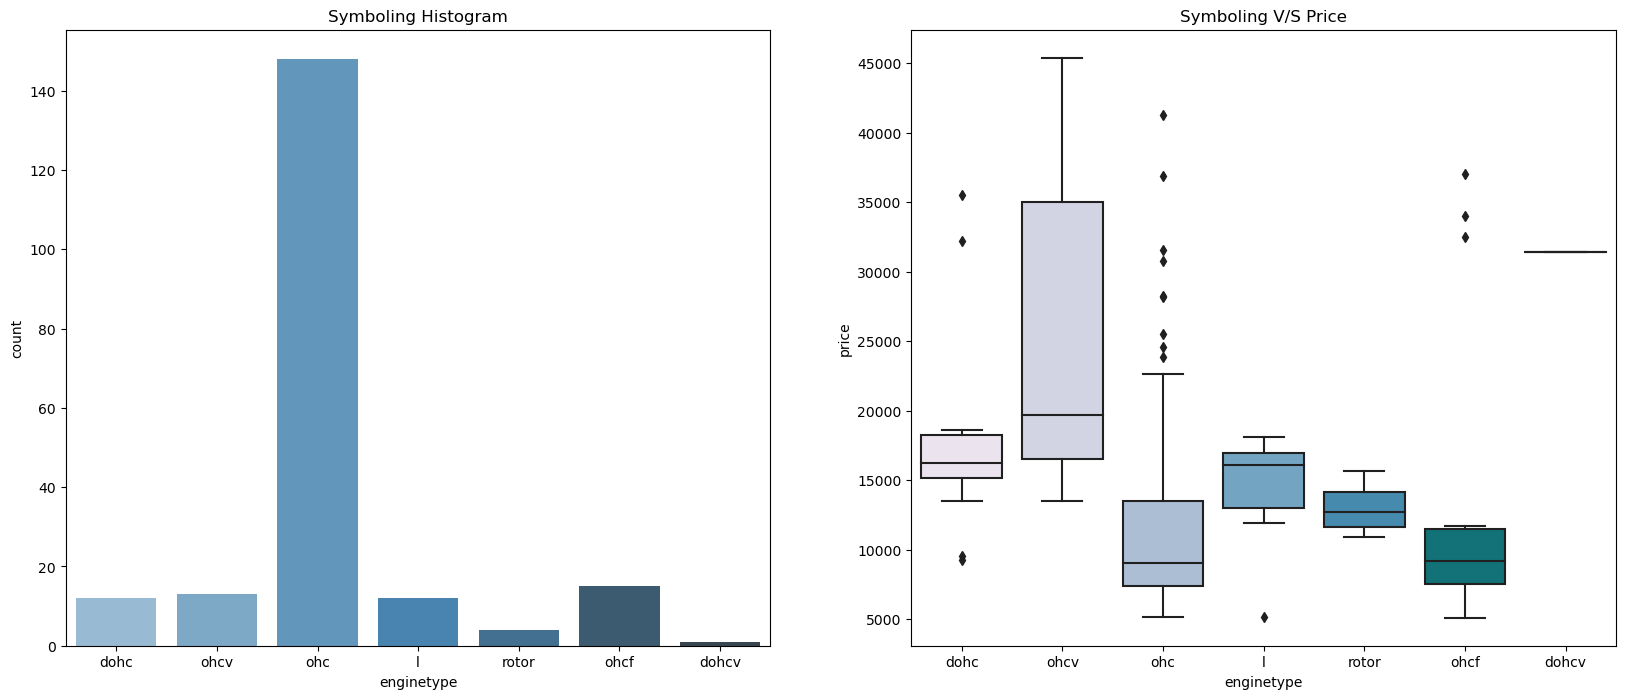

In [28]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title("Symboling Histogram")
sns.countplot(cars.enginetype,palette='Blues_d')

plt.subplot(1,2,2)
plt.title("Symboling V/S Price")
sns.boxplot(x=cars.enginetype,y=cars.price,palette='PuBuGn');

In [29]:
cars.groupby(by='enginetype').mean()[['price']]

price
enginetype              
dohc        18116.416667
dohcv       31400.500000
l           14627.583333
ohc         11574.048426
ohcf        13738.600000
ohcv        25098.384615
rotor       13020.000000

In [30]:
df=cars.groupby(by='enginetype').mean()[['price']].sort_values(by='price',ascending=False)

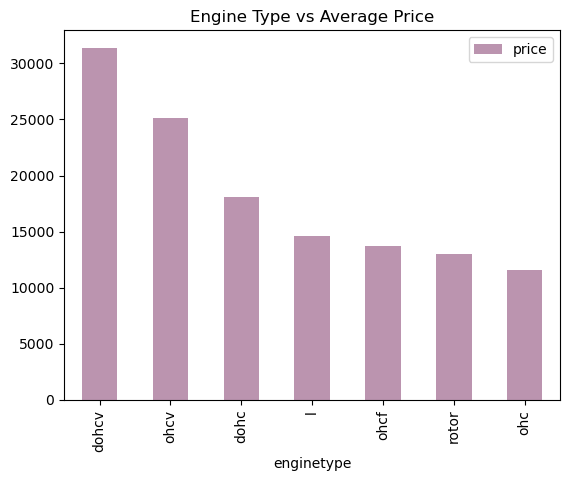

In [31]:
df.plot(kind='bar',color='#BB94AF')
plt.title("Engine Type vs Average Price");

#### Inference:
   1. `ohc` Engine type seems to be most favored type.
   2. `ohcv` has the heighest price range (while `dohcv` has very few rows),         ohc` and `ohcf` have low price range.

In [32]:
cars.groupby(by='CompanyName').mean()[['price']].sort_values(by='price',ascending=False)

price
CompanyName              
jaguar       34600.000000
buick        33647.000000
porsche      31400.500000
bmw          26118.750000
volvo        18063.181818
audi         17859.166714
mercury      16503.000000
alfa-romero  15498.333333
peugeot      15489.090909
saab         15223.333333
mazda        10652.882353
nissan       10415.666667
volkswagen   10077.500000
toyota        9885.812500
renault       9595.000000
mitsubishi    9239.769231
isuzu         8916.500000
subaru        8541.250000
honda         8184.692308
plymouth      7963.428571
dodge         7875.444444
chevrolet     6007.000000

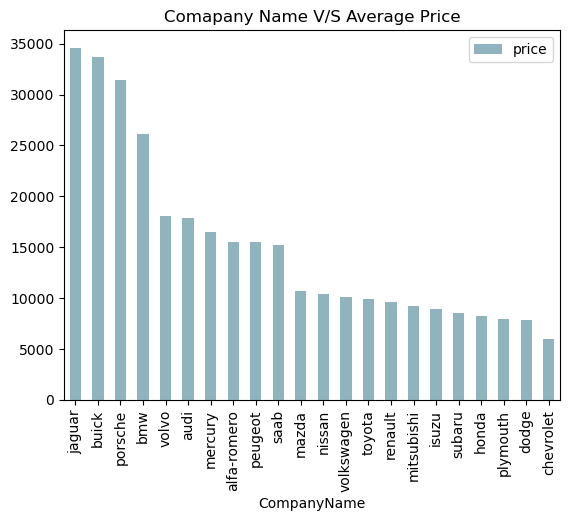

In [33]:
pd.DataFrame(cars.groupby(by='CompanyName').mean()[['price']].sort_values(by='price',ascending=False)).plot(kind='bar',color='#8fb4be')
plt.title("Comapany Name V/S Average Price");

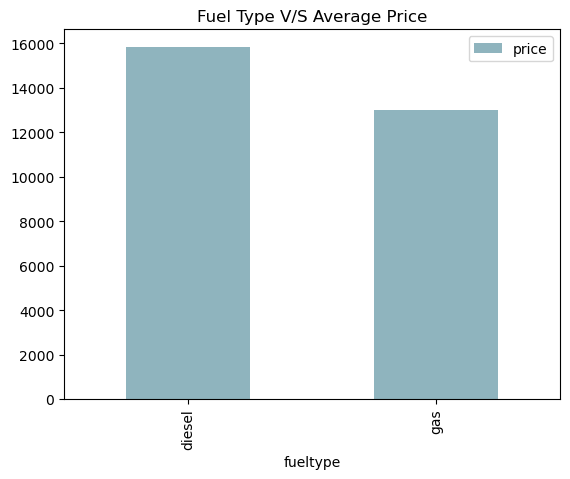

In [34]:
pd.DataFrame(cars.groupby(by='fueltype').mean()[['price']].sort_values(by='price',ascending=False)).plot(kind='bar',color='#8fb4be')
plt.title("Fuel Type V/S Average Price");

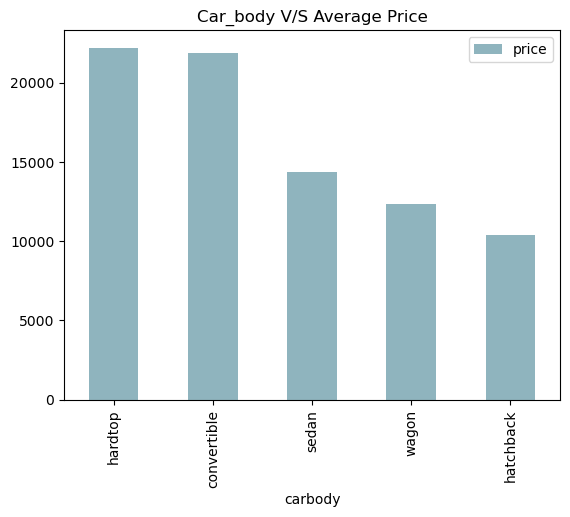

In [35]:
pd.DataFrame(cars.groupby(by='carbody').mean()[['price']].sort_values(by='price',ascending=False)).plot(kind='bar',color='#8fb4be')
plt.title("Car_body V/S Average Price");

#### Inference:
1. `Jaguar` and `Buick` seems to have heighest average price.
2. `diesel` cars are more expensive to 'gas/ppetrol' cars.
3. `hardtop` and `convertible` ae comparatively more expensive .

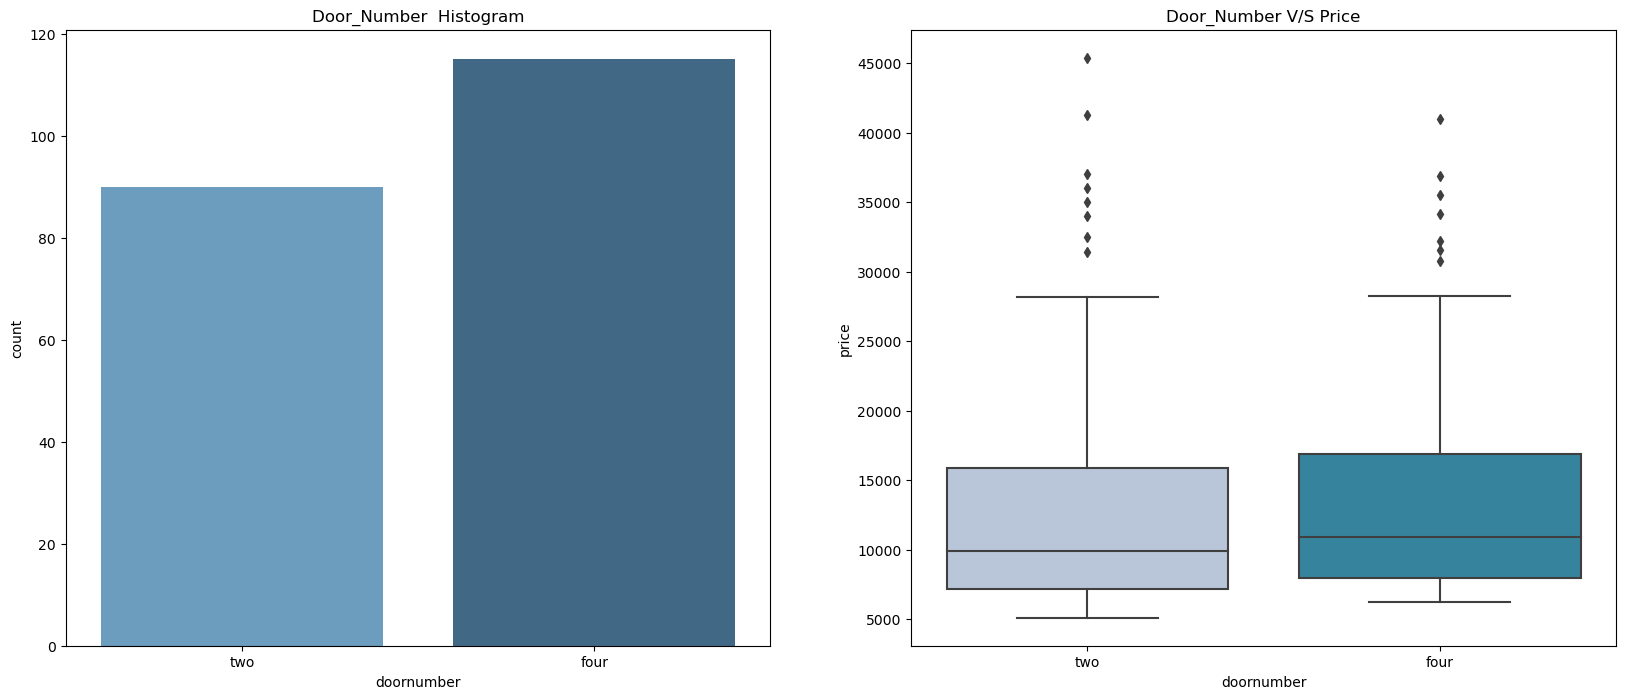

In [36]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title("Door_Number  Histogram")
sns.countplot(cars.doornumber,palette='Blues_d')

plt.subplot(1,2,2)
plt.title("Door_Number V/S Price")
sns.boxplot(x=cars.doornumber,y=cars.price,palette='PuBuGn');

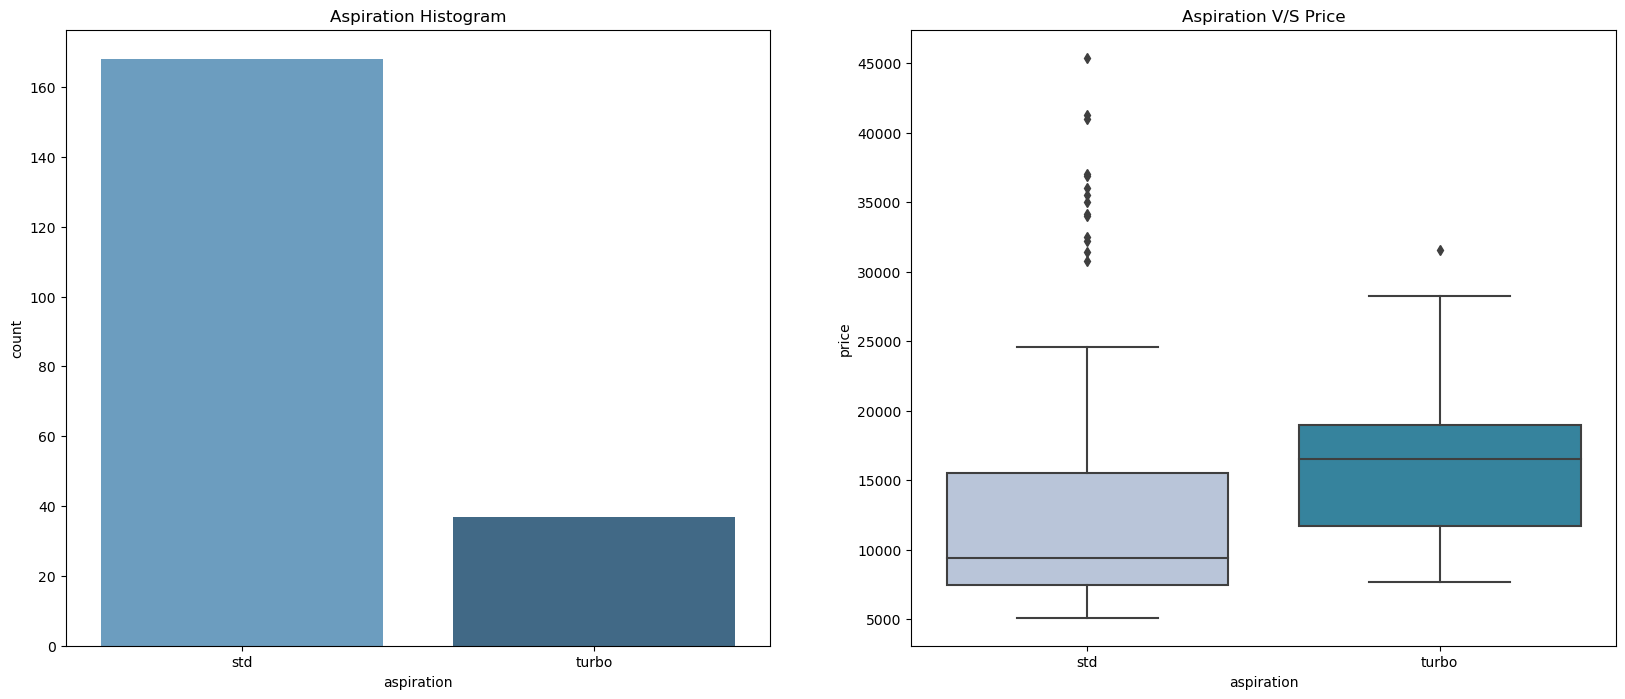

In [37]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title("Aspiration Histogram")
sns.countplot(cars.aspiration,palette='Blues_d')

plt.subplot(1,2,2)
plt.title("Aspiration V/S Price")
sns.boxplot(x=cars.aspiration,y=cars.price,palette='PuBuGn');

#### Inference:
1. `doornumber` variable is not affecting price that much.There is no significant difference between the categories in it.
2. It seems aspirations with `turbo` have heigher price and that of `standard` have very few ouliers in the price.

In [38]:
def plot_count_and_box_plot(x):
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    plt.title(x + " Histogram")
    sns.countplot(cars[x],palette='PuBuGn')
    
    plt.subplot(1,2,2)
    plt.title(x + " V/S Price")
    sns.boxplot(x=x,y='price',data=cars,palette='PuBuGn')

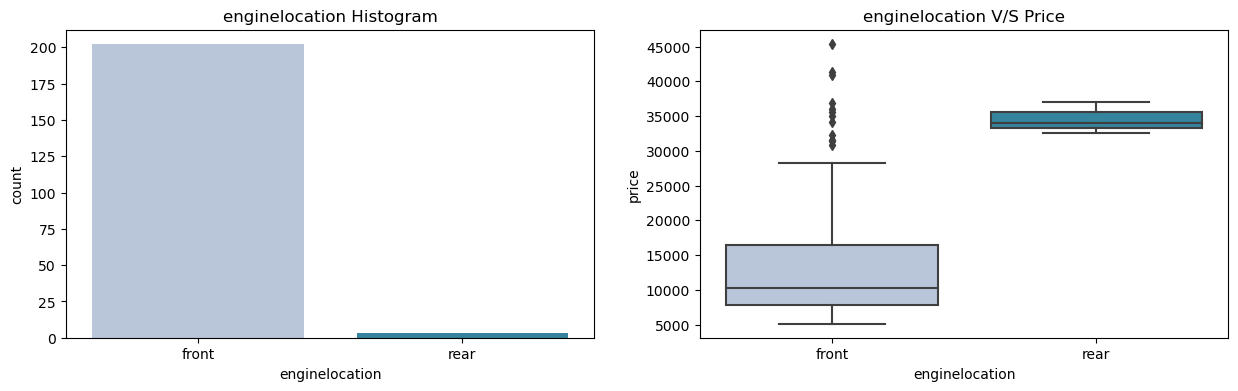

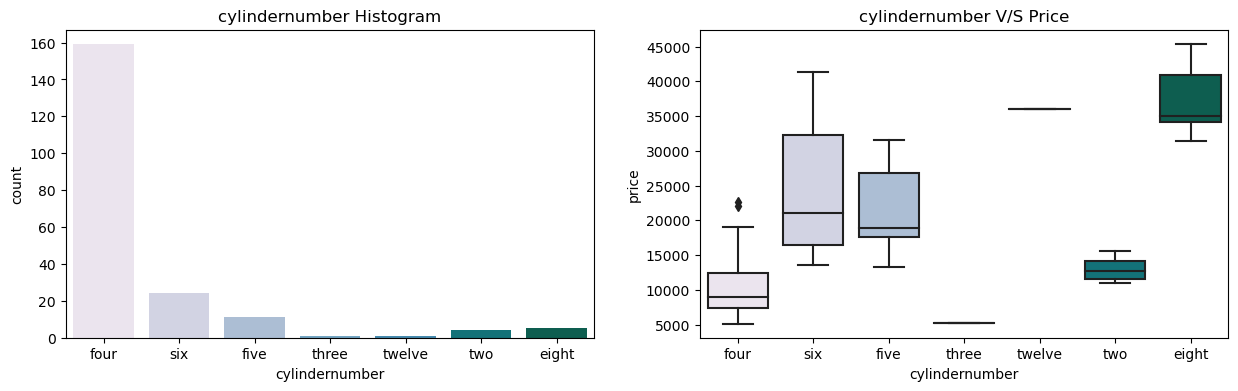

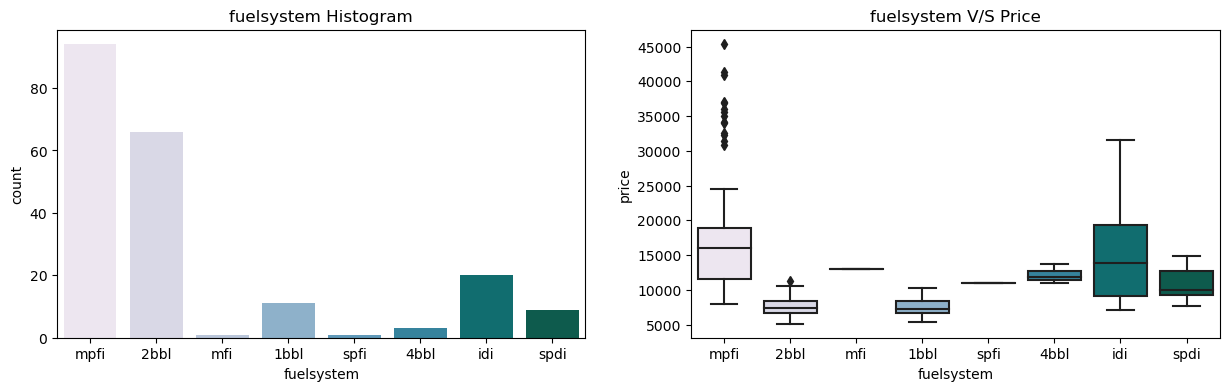

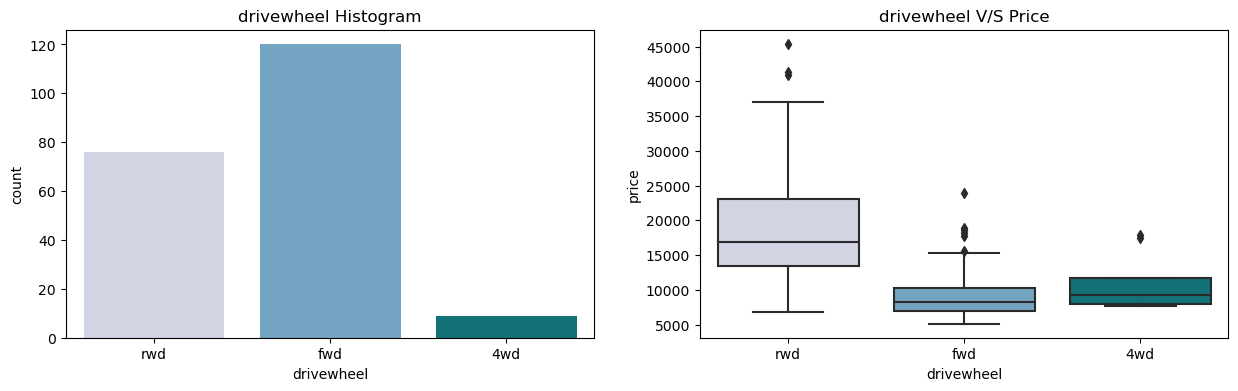

In [39]:
plot_count_and_box_plot('enginelocation')
plot_count_and_box_plot('cylindernumber')
plot_count_and_box_plot('fuelsystem')
plot_count_and_box_plot('drivewheel')

#### Inference:
1. `rear enginelocation` cars are rarely sold , maybe it is due to the fact that the price of `rear enginelocation` car is around 3 times that of a car having `front enginelocation`.
2. `mpfi` and `2bbl` are most common type of fuel systems.`mpfi` and `idi` are having the heighest price range.
3. A very significant difference in `drivewheel` category.Most of the expensive cars are having `rwd`.

### Steps 3.2:Visualising numerical data

In [40]:
cars.columns[cars.dtypes!='object']

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [41]:
def scatter(x,s_no):
    plt.figure(figsize=(10,20))
    plt.subplot(5,1,s_no)
    plt.scatter(x=x,y='price',data=cars)
    plt.title(x+ "V/S Price")
    plt.xlabel(x)
    plt.ylabel("Price")

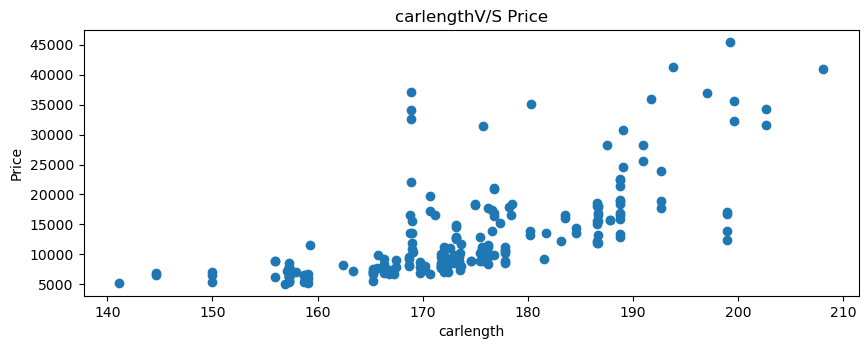

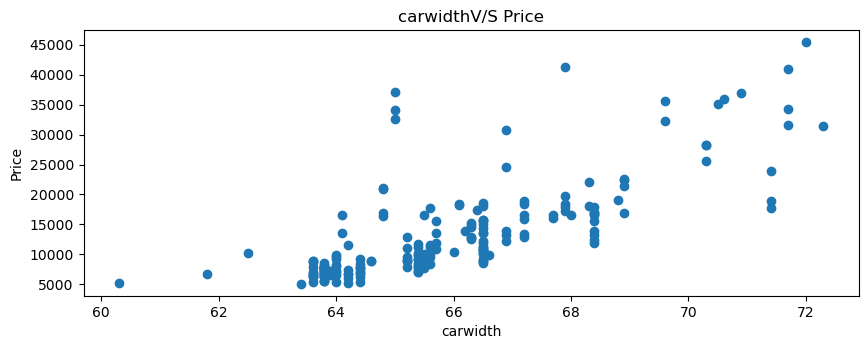

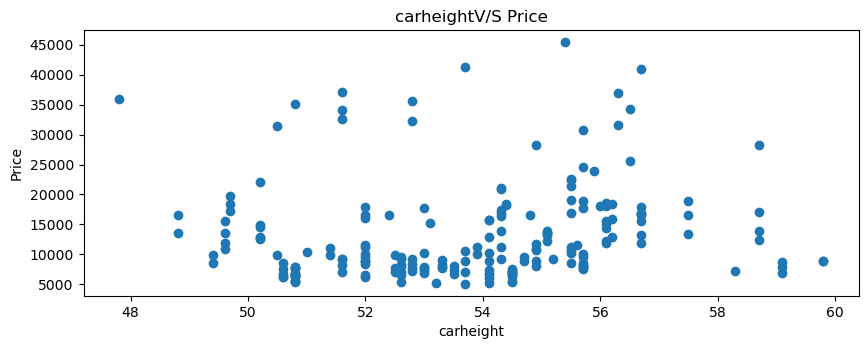

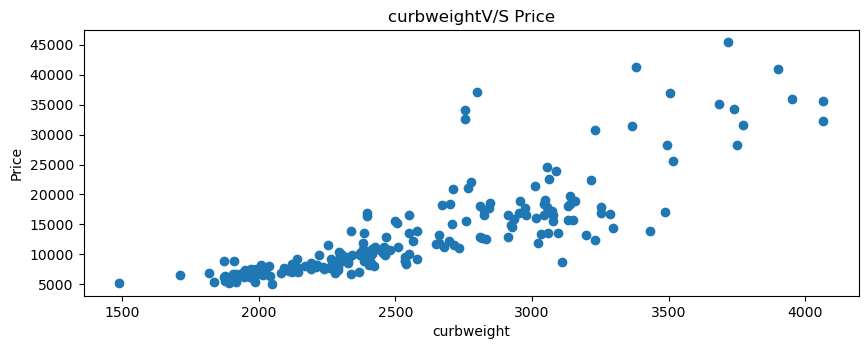

In [42]:
scatter('carlength',1)
scatter('carwidth',2)
scatter('carheight',3)
scatter('curbweight',4)

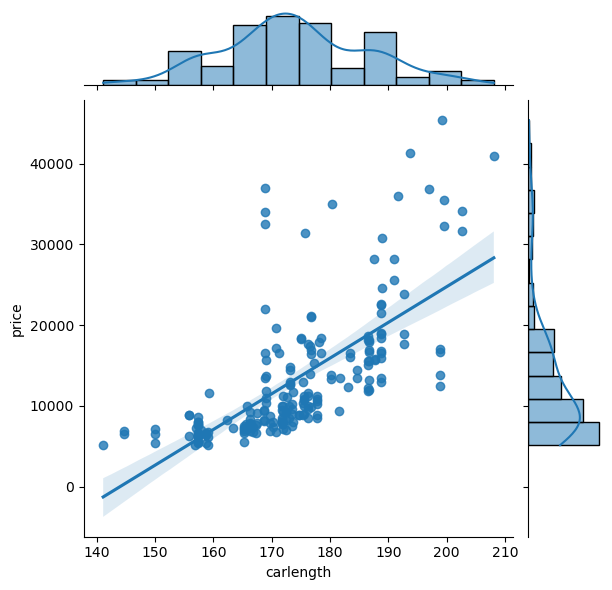

In [43]:
sns.jointplot(x='carlength',y='price',data=cars,kind='reg');

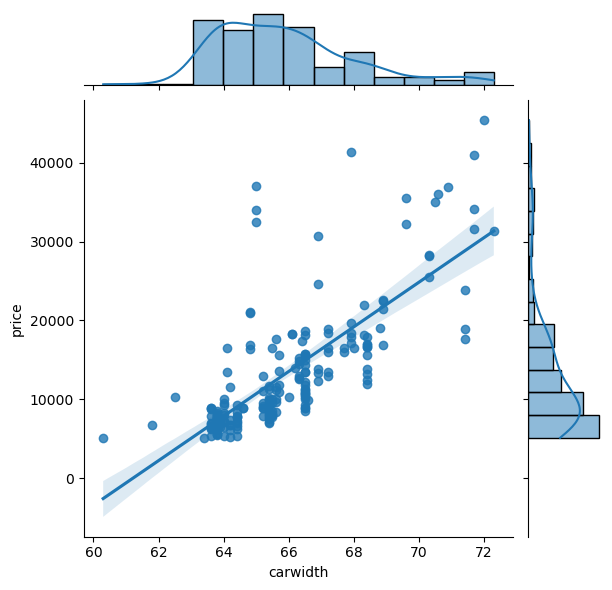

In [44]:
sns.jointplot(x= "carwidth", y='price', data=cars, kind="reg");

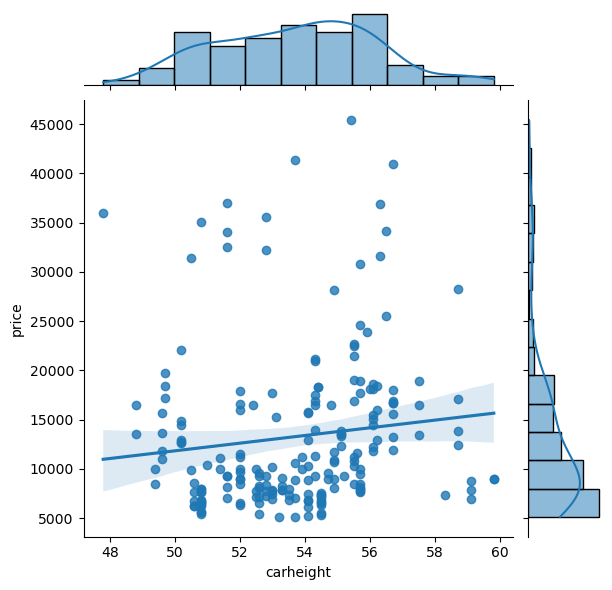

In [45]:
sns.jointplot(x= "carheight", y='price', data=cars, kind="reg");

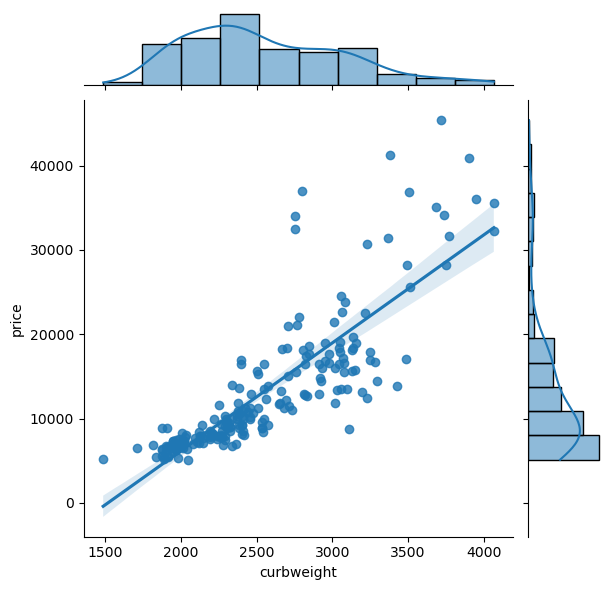

In [46]:
sns.jointplot(x= "curbweight", y='price', data=cars, kind="reg");

### Inference:
1. `carwidth`,`carlength` and `kerbweight` seems to be having a +ve correlation with `price`.
2. `carheight` doesn't show any significant trend with price.

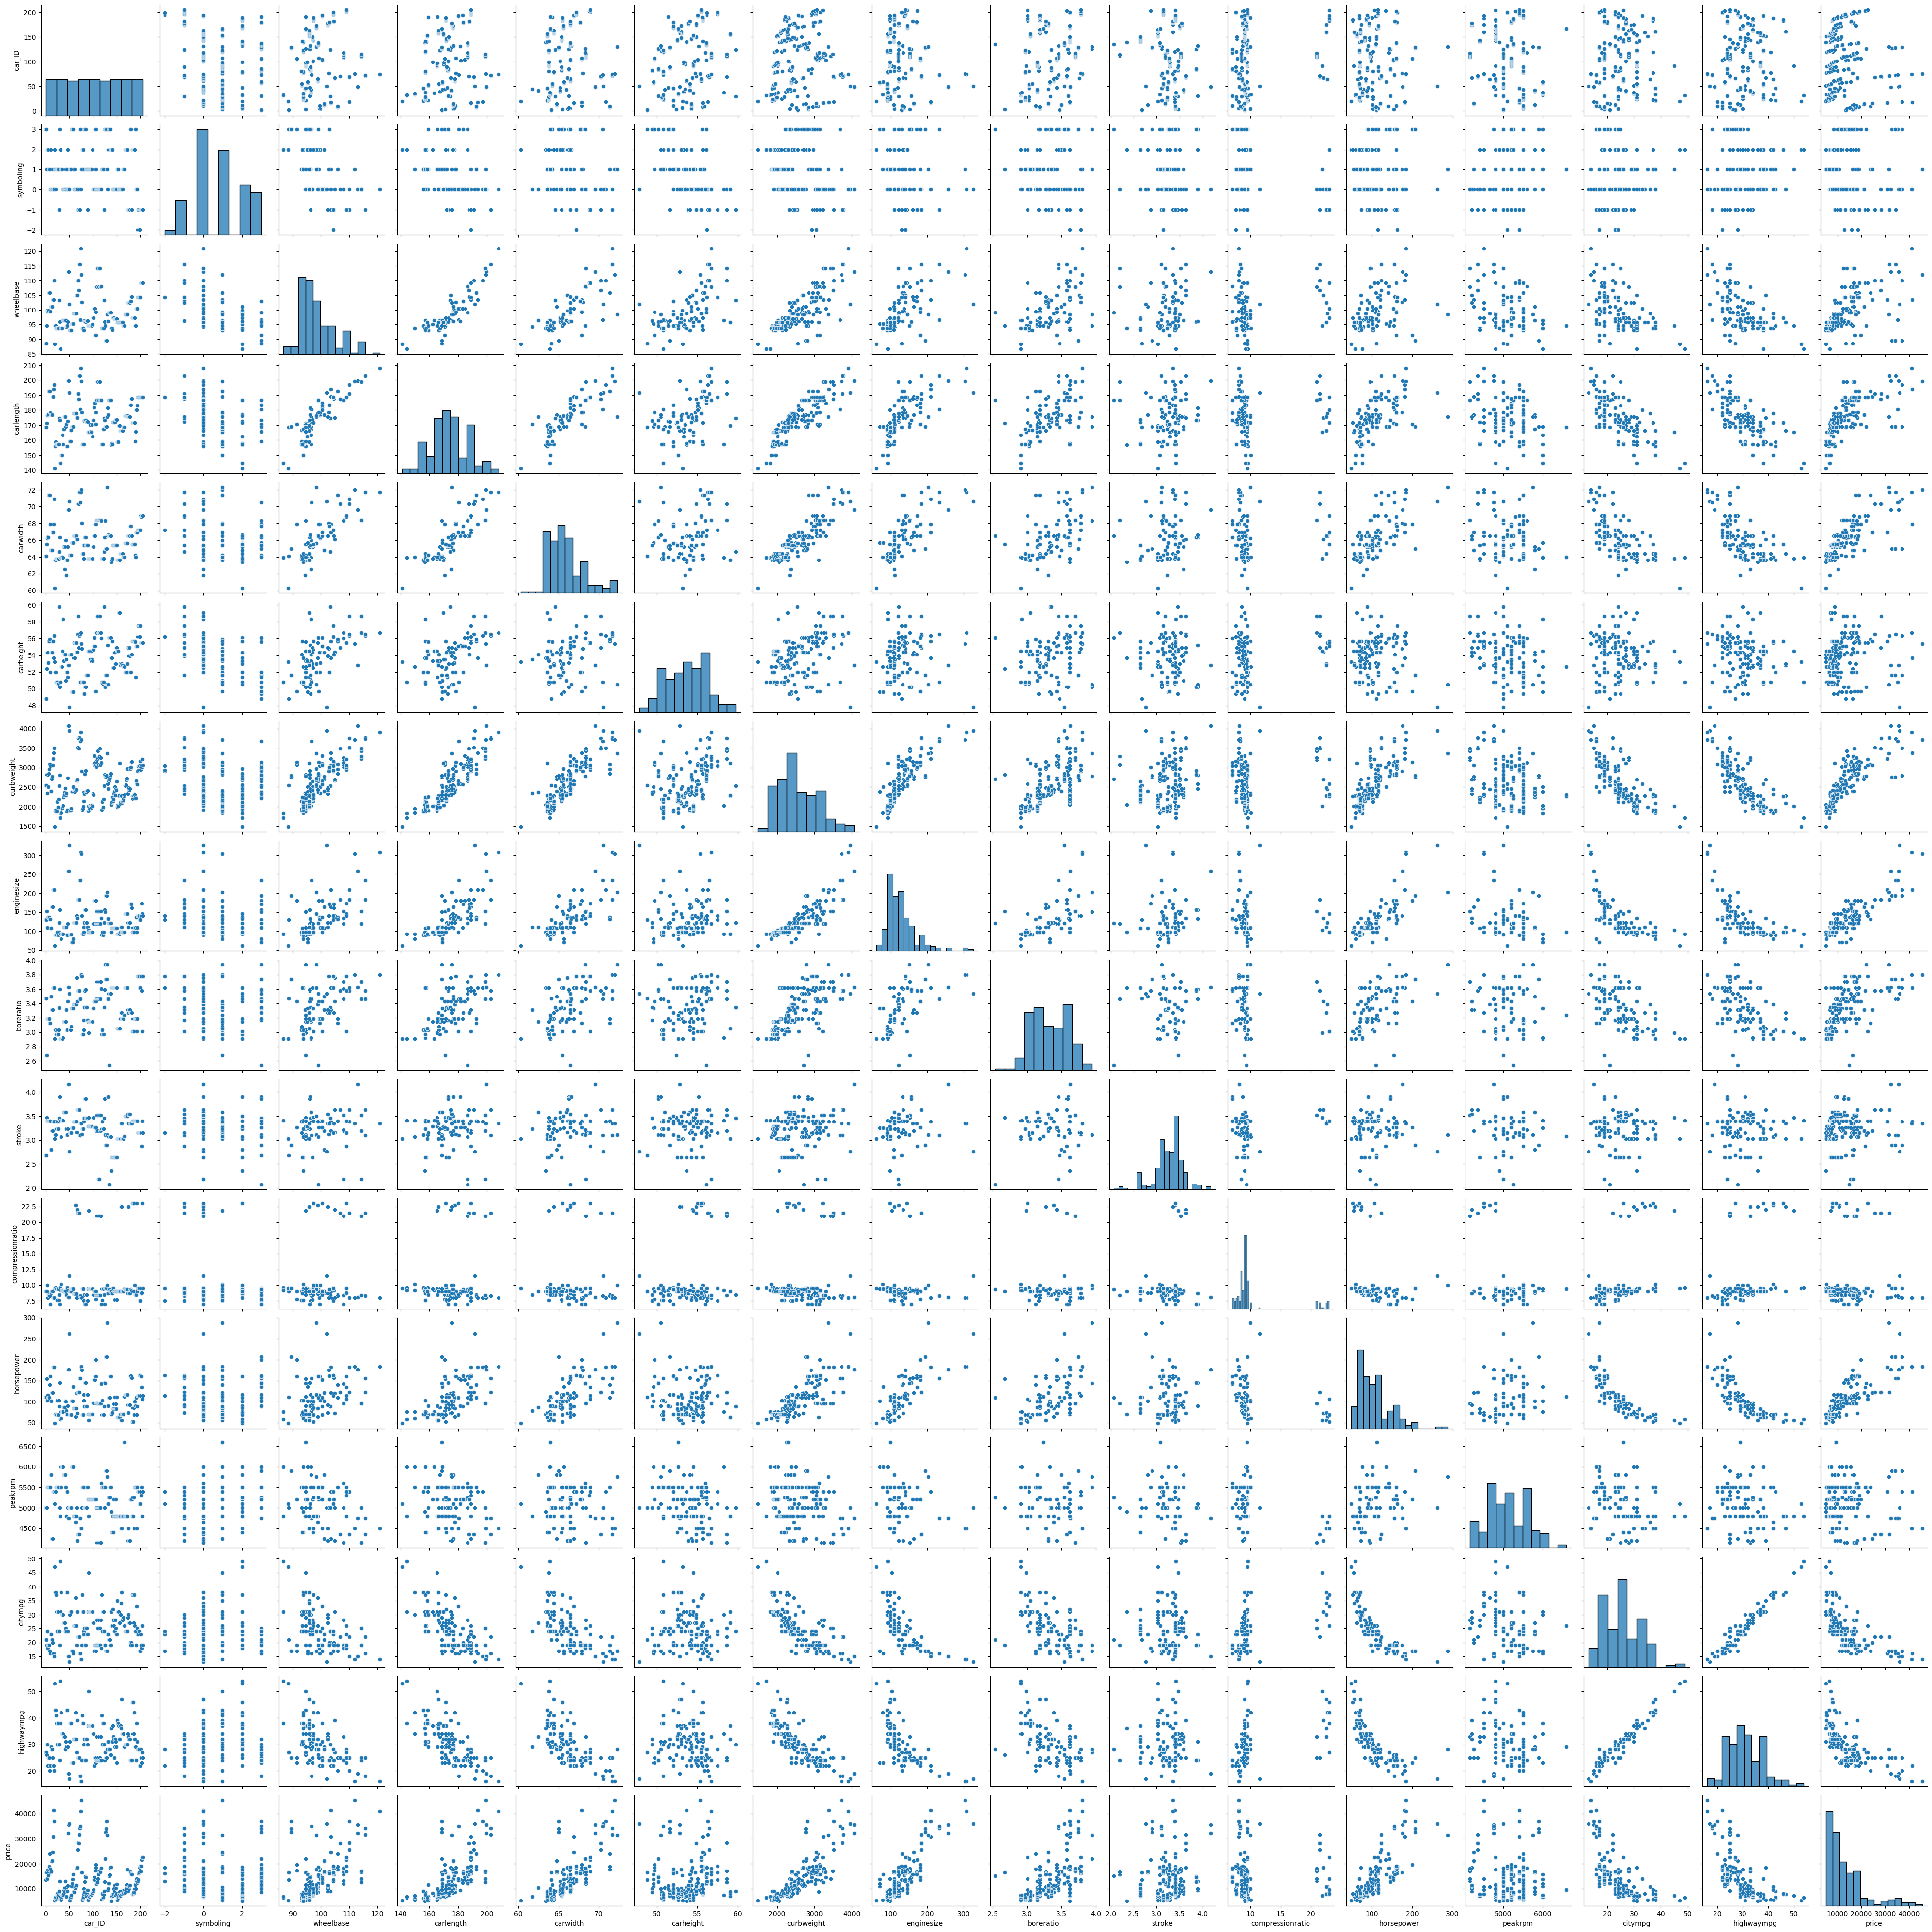

In [47]:
sns.pairplot(cars);

**Makes inference very hard**

In [48]:
def pp(x,y,z):
    sns.pairplot(data=cars,x_vars=[x,y,z],y_vars='price',kind='scatter',size=5)
    plt.show()

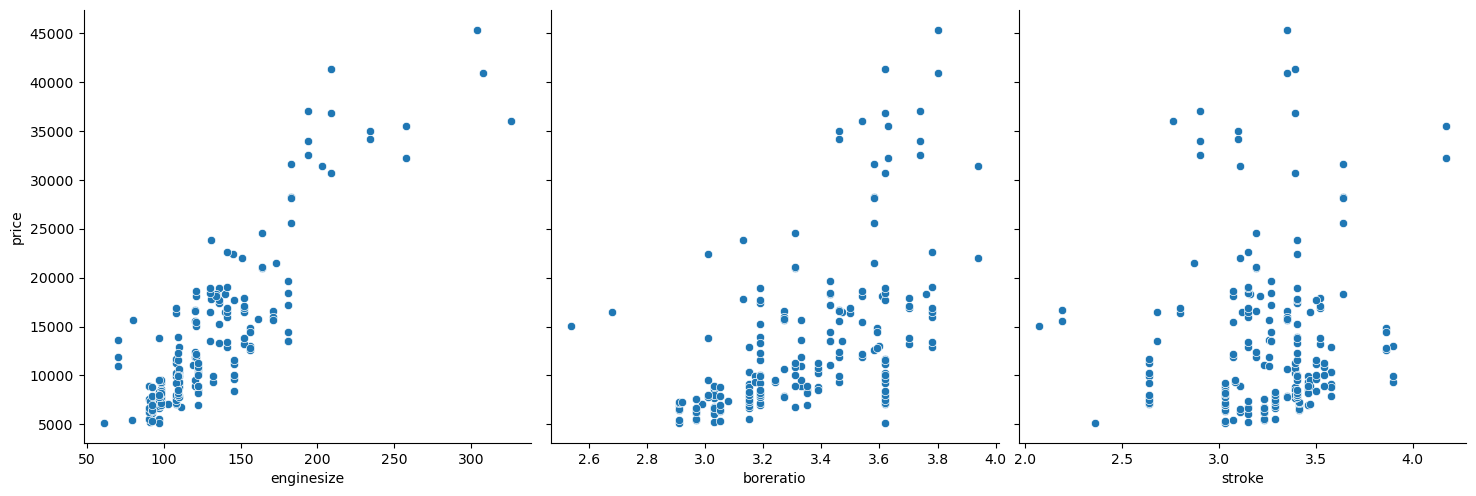

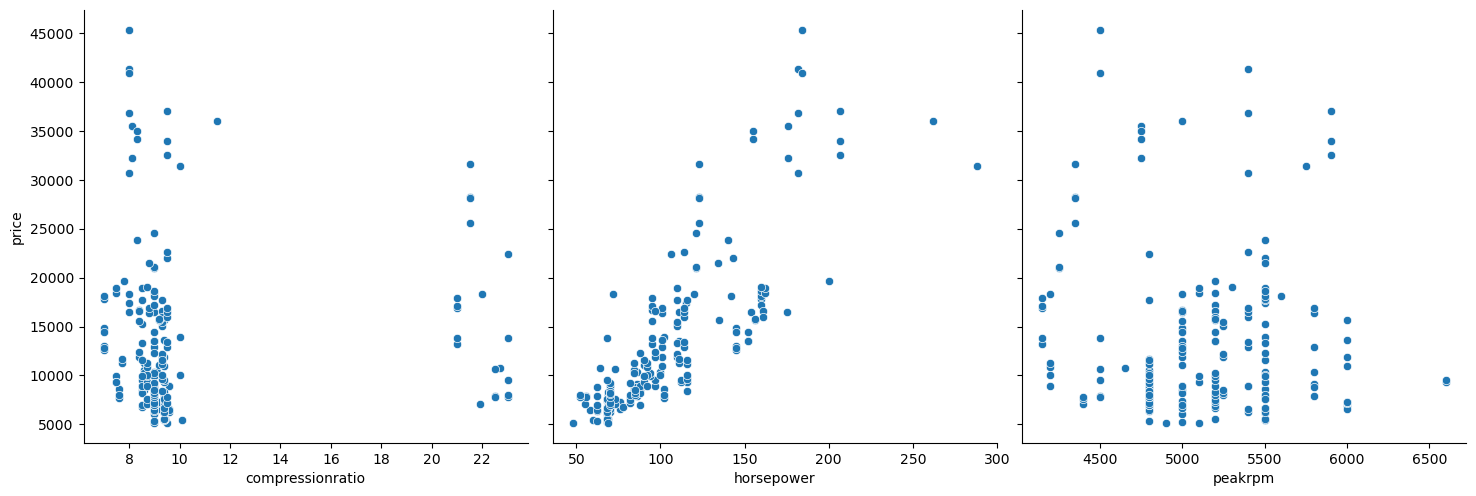

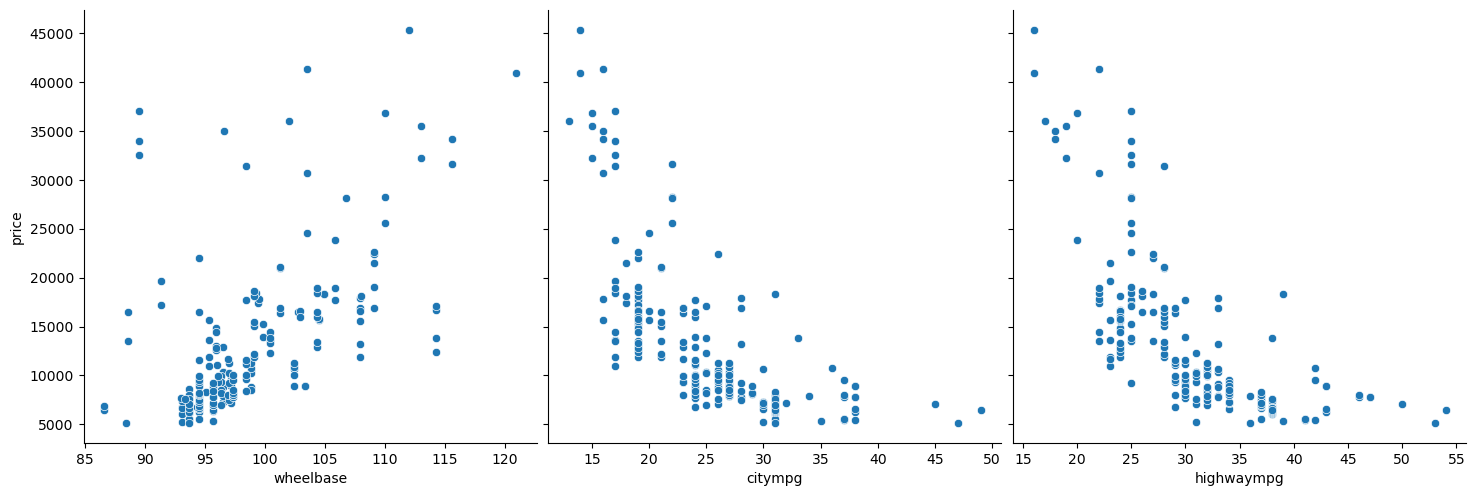

In [49]:
pp('enginesize','boreratio','stroke')
pp('compressionratio','horsepower','peakrpm')
pp('wheelbase','citympg','highwaympg');

In [50]:
def pp1(x,y,z):
    sns.pairplot(cars,x_vars=[x,y,z],y_vars='price',size=5,kind='reg')

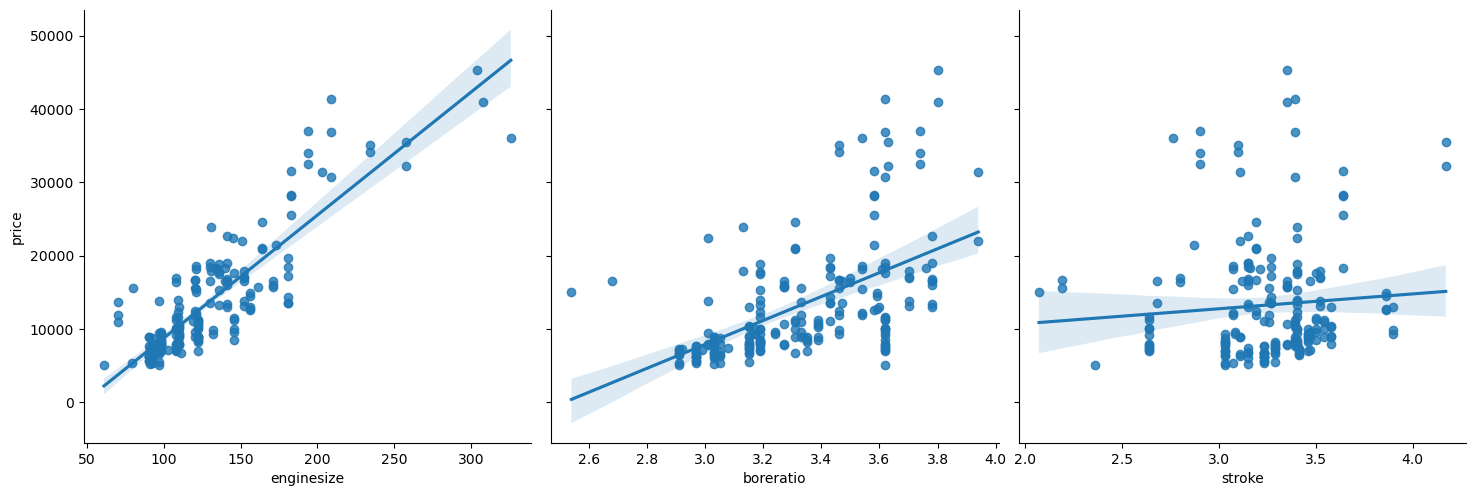

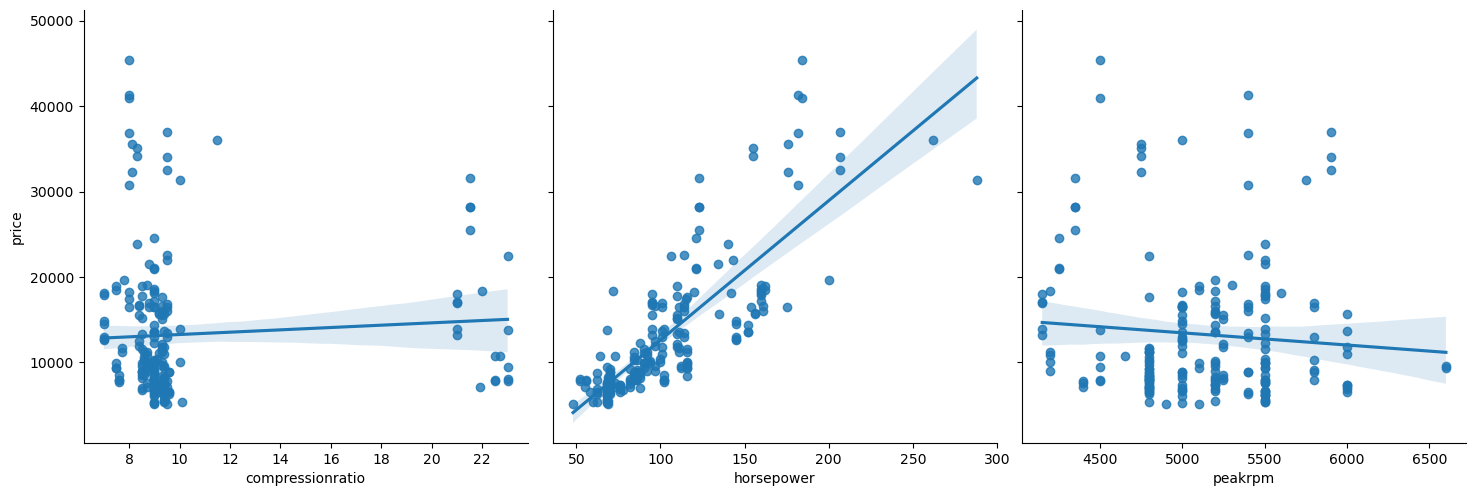

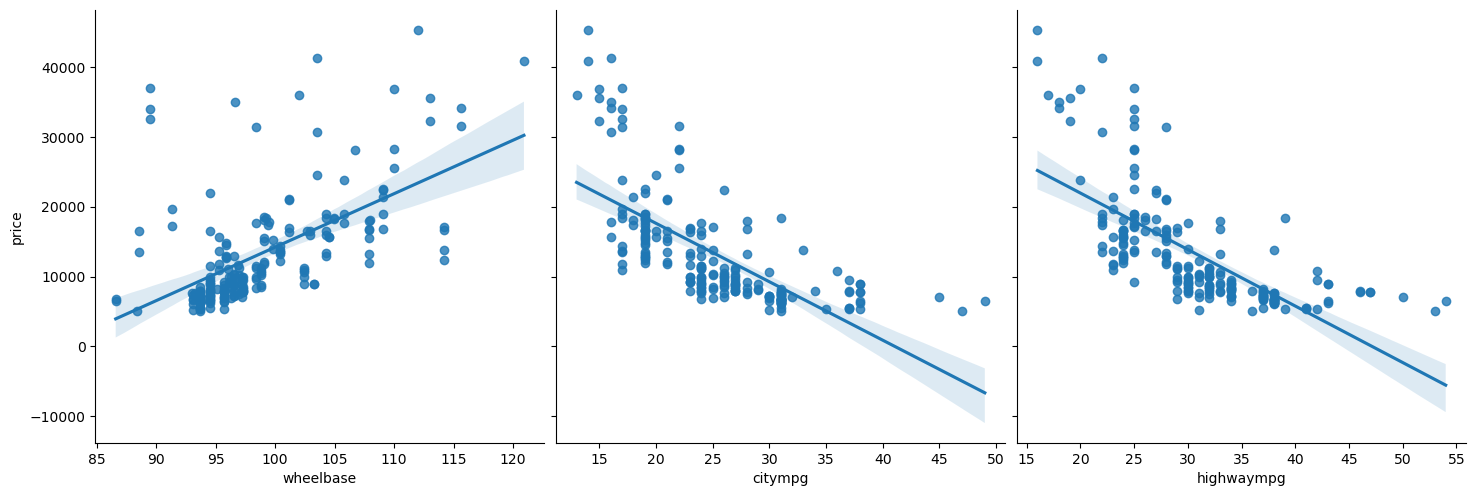

In [51]:
pp1('enginesize', 'boreratio', 'stroke')
pp1('compressionratio','horsepower','peakrpm')
pp1('wheelbase','citympg','highwaympg')

#### Inference:
1. `enginesize`,`boreratio`,`horespower`,`wheelbase` - seems to have a significant +ve correlation .
2. `citympg`,`highwaympg` - seems to have a significant -ve correlation.

In [52]:
np.corrcoef(x=cars['carlength'],y=cars['carwidth'])

array([[1.        , 0.84111827],
       [0.84111827, 1.        ]])

In [53]:
np.corrcoef(x=cars['carlength'],y=cars['carwidth'])[0,1]

0.841118268481846

## Step 4 :Feature Enginerring

Let us assume that we drive 55%(in km) of our car in city and rest 45% on highway.

In [54]:
cars['fueleconomy']=cars['citympg']*0.55 + cars['highwaympg']*0.45
cars.head()

car_ID  symboling  CompanyName fueltype aspiration doornumber      carbody  \
0       1          3  alfa-romero      gas        std        two  convertible   
1       2          3  alfa-romero      gas        std        two  convertible   
2       3          1  alfa-romero      gas        std        two    hatchback   
3       4          2         audi      gas        std       four        sedan   
4       5          2         audi      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  \
0        rwd          front       88.6      168.8      64.1       48.8   
1        rwd          front       88.6      168.8      64.1       48.8   
2        rwd          front       94.5      171.2      65.5       52.4   
3        fwd          front       99.8      176.6      66.2       54.3   
4        4wd          front       99.4      176.6      66.4       54.3   

   curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  \
0        2548       dohc           four         130       mpfi       3.47   
1        2548       dohc           four         130       mpfi       3.47   
2        2823       ohcv            six         152       mpfi       2.68   
3        2337        ohc           four         109       mpfi       3.19   
4        2824        ohc           five         136       mpfi       3.19   

   stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg  \
0    2.68               9.0         111     5000       21          27   
1    2.68               9.0         111     5000       21          27   
2    3.47               9.0         154     5000       19          26   
3    3.40              10.0         102     5500       24          30   
4    3.40               8.0         115     5500       18          22   

     price  fueleconomy  
0  13495.0        23.70  
1  16500.0        23.70  
2  16500.0        22.15  
3  13950.0        26.70  
4  17450.0        19.80

**Binning the car companies based on avg prices of each company**

In [55]:
cars['price'].dtype

dtype('float64')

In [56]:
cars['price']=cars['price'].astype('int')
cars['price'].dtype

dtype('int32')

In [57]:
table=cars.groupby(['CompanyName'])['price'].mean().sort_values(ascending=False)
table

CompanyName
jaguar         34600.000000
buick          33647.000000
porsche        31400.400000
bmw            26118.750000
volvo          18063.181818
audi           17859.142857
mercury        16503.000000
alfa-romero    15498.333333
peugeot        15489.090909
saab           15223.333333
mazda          10652.882353
nissan         10415.666667
volkswagen     10077.500000
toyota          9885.812500
renault         9595.000000
mitsubishi      9239.769231
isuzu           8916.250000
subaru          8541.250000
honda           8184.692308
plymouth        7963.428571
dodge           7875.444444
chevrolet       6007.000000
Name: price, dtype: float64

Now we can do a copy to keep original cars file separate and keep merged file with new feature separate.

In [58]:
temp=cars.copy()
temp

car_ID  symboling  CompanyName fueltype aspiration doornumber  \
0         1          3  alfa-romero      gas        std        two   
1         2          3  alfa-romero      gas        std        two   
2         3          1  alfa-romero      gas        std        two   
3         4          2         audi      gas        std       four   
4         5          2         audi      gas        std       four   
..      ...        ...          ...      ...        ...        ...   
200     201         -1        volvo      gas        std       four   
201     202         -1        volvo      gas      turbo       four   
202     203         -1        volvo      gas        std       four   
203     204         -1        volvo   diesel      turbo       four   
204     205         -1        volvo      gas      turbo       four   

         carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0    convertible        rwd          front       88.6      168.8      64.1   
1    convertible        rwd          front       88.6      168.8      64.1   
2      hatchback        rwd          front       94.5      171.2      65.5   
3          sedan        fwd          front       99.8      176.6      66.2   
4          sedan        4wd          front       99.4      176.6      66.4   
..           ...        ...            ...        ...        ...       ...   
200        sedan        rwd          front      109.1      188.8      68.9   
201        sedan        rwd          front      109.1      188.8      68.8   
202        sedan        rwd          front      109.1      188.8      68.9   
203        sedan        rwd          front      109.1      188.8      68.9   
204        sedan        rwd          front      109.1      188.8      68.9   

     carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0         48.8        2548       dohc           four         130       mpfi   
1         48.8        2548       dohc           four         130       mpfi   
2         52.4        2823       ohcv            six         152       mpfi   
3         54.3        2337        ohc           four         109       mpfi   
4         54.3        2824        ohc           five         136       mpfi   
..         ...         ...        ...            ...         ...        ...   
200       55.5        2952        ohc           four         141       mpfi   
201       55.5        3049        ohc           four         141       mpfi   
202       55.5        3012       ohcv            six         173       mpfi   
203       55.5        3217        ohc            six         145        idi   
204       55.5        3062        ohc           four         141       mpfi   

     boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0         3.47    2.68               9.0         111     5000       21   
1         3.47    2.68               9.0         111     5000       21   
2         2.68    3.47               9.0         154     5000       19   
3         3.19    3.40              10.0         102     5500       24   
4         3.19    3.40               8.0         115     5500       18   
..         ...     ...               ...         ...      ...      ...   
200       3.78    3.15               9.5         114     5400       23   
201       3.78    3.15               8.7         160     5300       19   
202       3.58    2.87               8.8         134     5500       18   
203       3.01    3.40              23.0         106     4800       26   
204       3.78    3.15               9.5         114     5400       19   

     highwaympg  price  fueleconomy  
0            27  13495        23.70  
1            27  16500        23.70  
2            26  16500        22.15  
3            30  13950        26.70  
4            22  17450        19.80  
..          ...    ...          ...  
200          28  16845        25.25  
201          25  19045        21.70  
202          23  21485        20.25  
203      

In [59]:
temp=temp.merge(table.reset_index(),how='left',on='CompanyName')

In [60]:
temp.head()

car_ID  symboling  CompanyName fueltype aspiration doornumber      carbody  \
0       1          3  alfa-romero      gas        std        two  convertible   
1       2          3  alfa-romero      gas        std        two  convertible   
2       3          1  alfa-romero      gas        std        two    hatchback   
3       4          2         audi      gas        std       four        sedan   
4       5          2         audi      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  \
0        rwd          front       88.6      168.8      64.1       48.8   
1        rwd          front       88.6      168.8      64.1       48.8   
2        rwd          front       94.5      171.2      65.5       52.4   
3        fwd          front       99.8      176.6      66.2       54.3   
4        4wd          front       99.4      176.6      66.4       54.3   

   curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  \
0        2548       dohc           four         130       mpfi       3.47   
1        2548       dohc           four         130       mpfi       3.47   
2        2823       ohcv            six         152       mpfi       2.68   
3        2337        ohc           four         109       mpfi       3.19   
4        2824        ohc           five         136       mpfi       3.19   

   stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg  \
0    2.68               9.0         111     5000       21          27   
1    2.68               9.0         111     5000       21          27   
2    3.47               9.0         154     5000       19          26   
3    3.40              10.0         102     5500       24          30   
4    3.40               8.0         115     5500       18          22   

   price_x  fueleconomy       price_y  
0    13495        23.70  15498.333333  
1    16500        23.70  15498.333333  
2    16500        22.15  15498.333333  
3    13950        26.70  17859.142857  
4    17450        19.80  17859.142857

In [61]:
cars.price.describe()

count      205.000000
mean     13276.702439
std       7988.848977
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [62]:
bins=[0,10000,20000,40000]
cars['carrange']=pd.cut(x=temp['price_y'],bins=bins,right=False,
       labels=['Budget','Medium','Highend'])
cars.head()

car_ID  symboling  CompanyName fueltype aspiration doornumber      carbody  \
0       1          3  alfa-romero      gas        std        two  convertible   
1       2          3  alfa-romero      gas        std        two  convertible   
2       3          1  alfa-romero      gas        std        two    hatchback   
3       4          2         audi      gas        std       four        sedan   
4       5          2         audi      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  \
0        rwd          front       88.6      168.8      64.1       48.8   
1        rwd          front       88.6      168.8      64.1       48.8   
2        rwd          front       94.5      171.2      65.5       52.4   
3        fwd          front       99.8      176.6      66.2       54.3   
4        4wd          front       99.4      176.6      66.4       54.3   

   curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  \
0        2548       dohc           four         130       mpfi       3.47   
1        2548       dohc           four         130       mpfi       3.47   
2        2823       ohcv            six         152       mpfi       2.68   
3        2337        ohc           four         109       mpfi       3.19   
4        2824        ohc           five         136       mpfi       3.19   

   stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg  price  \
0    2.68               9.0         111     5000       21          27  13495   
1    2.68               9.0         111     5000       21          27  16500   
2    3.47               9.0         154     5000       19          26  16500   
3    3.40              10.0         102     5500       24          30  13950   
4    3.40               8.0         115     5500       18          22  17450   

   fueleconomy carrange  
0        23.70   Medium  
1        23.70   Medium  
2        22.15   Medium  
3        26.70   Medium  
4        19.80   Medium

In [63]:
cars.carrange.value_counts()

Budget     95
Medium     86
Highend    24
Name: carrange, dtype: int64

In [64]:
cars.carrange.value_counts(normalize=True)*100

Budget     46.341463
Medium     41.951220
Highend    11.707317
Name: carrange, dtype: float64

### Step 5: Bivariate Analysis

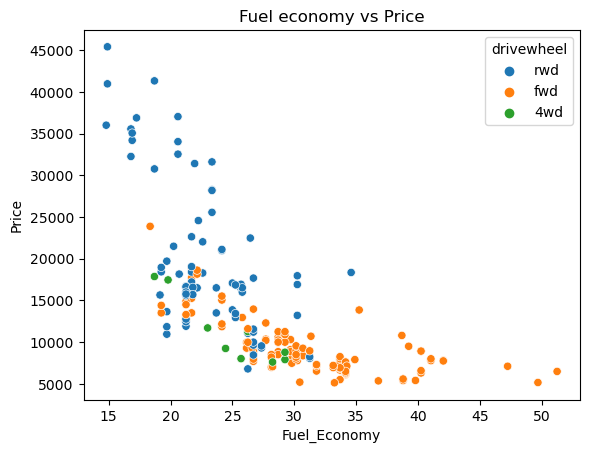

In [65]:
plt.title("Fuel economy vs Price")
sns.scatterplot(x='fueleconomy',y='price',data=cars,hue='drivewheel')
plt.xlabel("Fuel_Economy")
plt.ylabel("Price")
plt.show()

In [66]:
cars.drivewheel.value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

#### Inference:
1. `fueleconomy` has an obvious negative correaltion with price and the correlation significant in nature.

In [67]:
cars.groupby(['fuelsystem','drivewheel','carrange']).mean()[['price']].unstack()

price                       
carrange                     Budget        Medium  Highend
fuelsystem drivewheel                                     
1bbl       4wd                  NaN           NaN      NaN
           fwd          7555.545455           NaN      NaN
           rwd                  NaN           NaN      NaN
2bbl       4wd          8305.000000           NaN      NaN
           fwd          7126.000000   7870.904762      NaN
           rwd          7693.666667           NaN      NaN
4bbl       4wd                  NaN           NaN      NaN
           fwd                  NaN           NaN      NaN
           rwd                  NaN  12145.000000      NaN
idi        4wd                  NaN           NaN      NaN
           fwd          8794.666667   9500.666667      NaN
           rwd                  NaN  17114.142857  28394.0
mfi        4wd                  NaN           NaN      NaN
           fwd         12964.000000           NaN      NaN
           rwd                  NaN           NaN      NaN
mpfi       4wd         11476.500000  17654.500000      NaN
           fwd          9990.000000  13830.090909      NaN
           rwd         12610.500000  16793.600000  31267.6
spdi       4wd                  NaN           NaN      NaN
           fwd         10768.750000           NaN      NaN
           rwd         12764.000000           NaN      NaN
spfi       4wd                  NaN           NaN      NaN
           fwd                  NaN           NaN      NaN
           rwd         11048.000000           NaN      NaN

<AxesSubplot:xlabel='fuelsystem,drivewheel'>

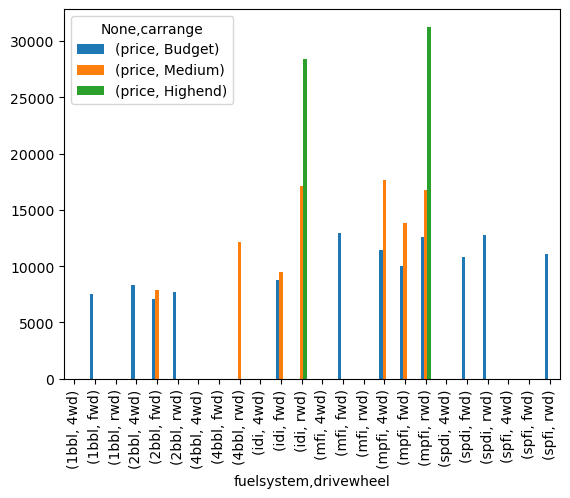

In [68]:
df=cars.groupby(['fuelsystem','drivewheel','carrange']).mean()[['price']].unstack()
df.plot(kind='bar')

### Inference :
1. High ranged cars prefer `rwd` drivewheel with `idi` or `mpfi` fuelsystem.

### List of significant variables after Visual analysis :

    - Car Range 
    - Engine Type 
    - Fuel type 
    - Car Body 
    - Aspiration 
    - Cylinder Number 
    - Drivewheel 
    - Curbweight 
    - Car Length
    - Car width
    - Engine Size 
    - Boreratio 
    - Horse Power 
    - Wheel base 
    - Fuel Economy 

In [69]:
len(cars.columns)

28

In [70]:
cars_lr = cars[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'fueleconomy', 'carlength','carwidth', 'carrange']]
cars_lr.head()

price fueltype aspiration      carbody drivewheel  wheelbase  curbweight  \
0  13495      gas        std  convertible        rwd       88.6        2548   
1  16500      gas        std  convertible        rwd       88.6        2548   
2  16500      gas        std    hatchback        rwd       94.5        2823   
3  13950      gas        std        sedan        fwd       99.8        2337   
4  17450      gas        std        sedan        4wd       99.4        2824   

  enginetype cylindernumber  enginesize  boreratio  horsepower  fueleconomy  \
0       dohc           four         130       3.47         111        23.70   
1       dohc           four         130       3.47         111        23.70   
2       ohcv            six         152       2.68         154        22.15   
3        ohc           four         109       3.19         102        26.70   
4        ohc           five         136       3.19         115        19.80   

   carlength  carwidth carrange  
0      168.8      64.1   Medium  
1      168.8      64.1   Medium  
2      171.2      65.5   Medium  
3      176.6      66.2   Medium  
4      176.6      66.4   Medium

In [71]:
len(cars_lr.columns)

16

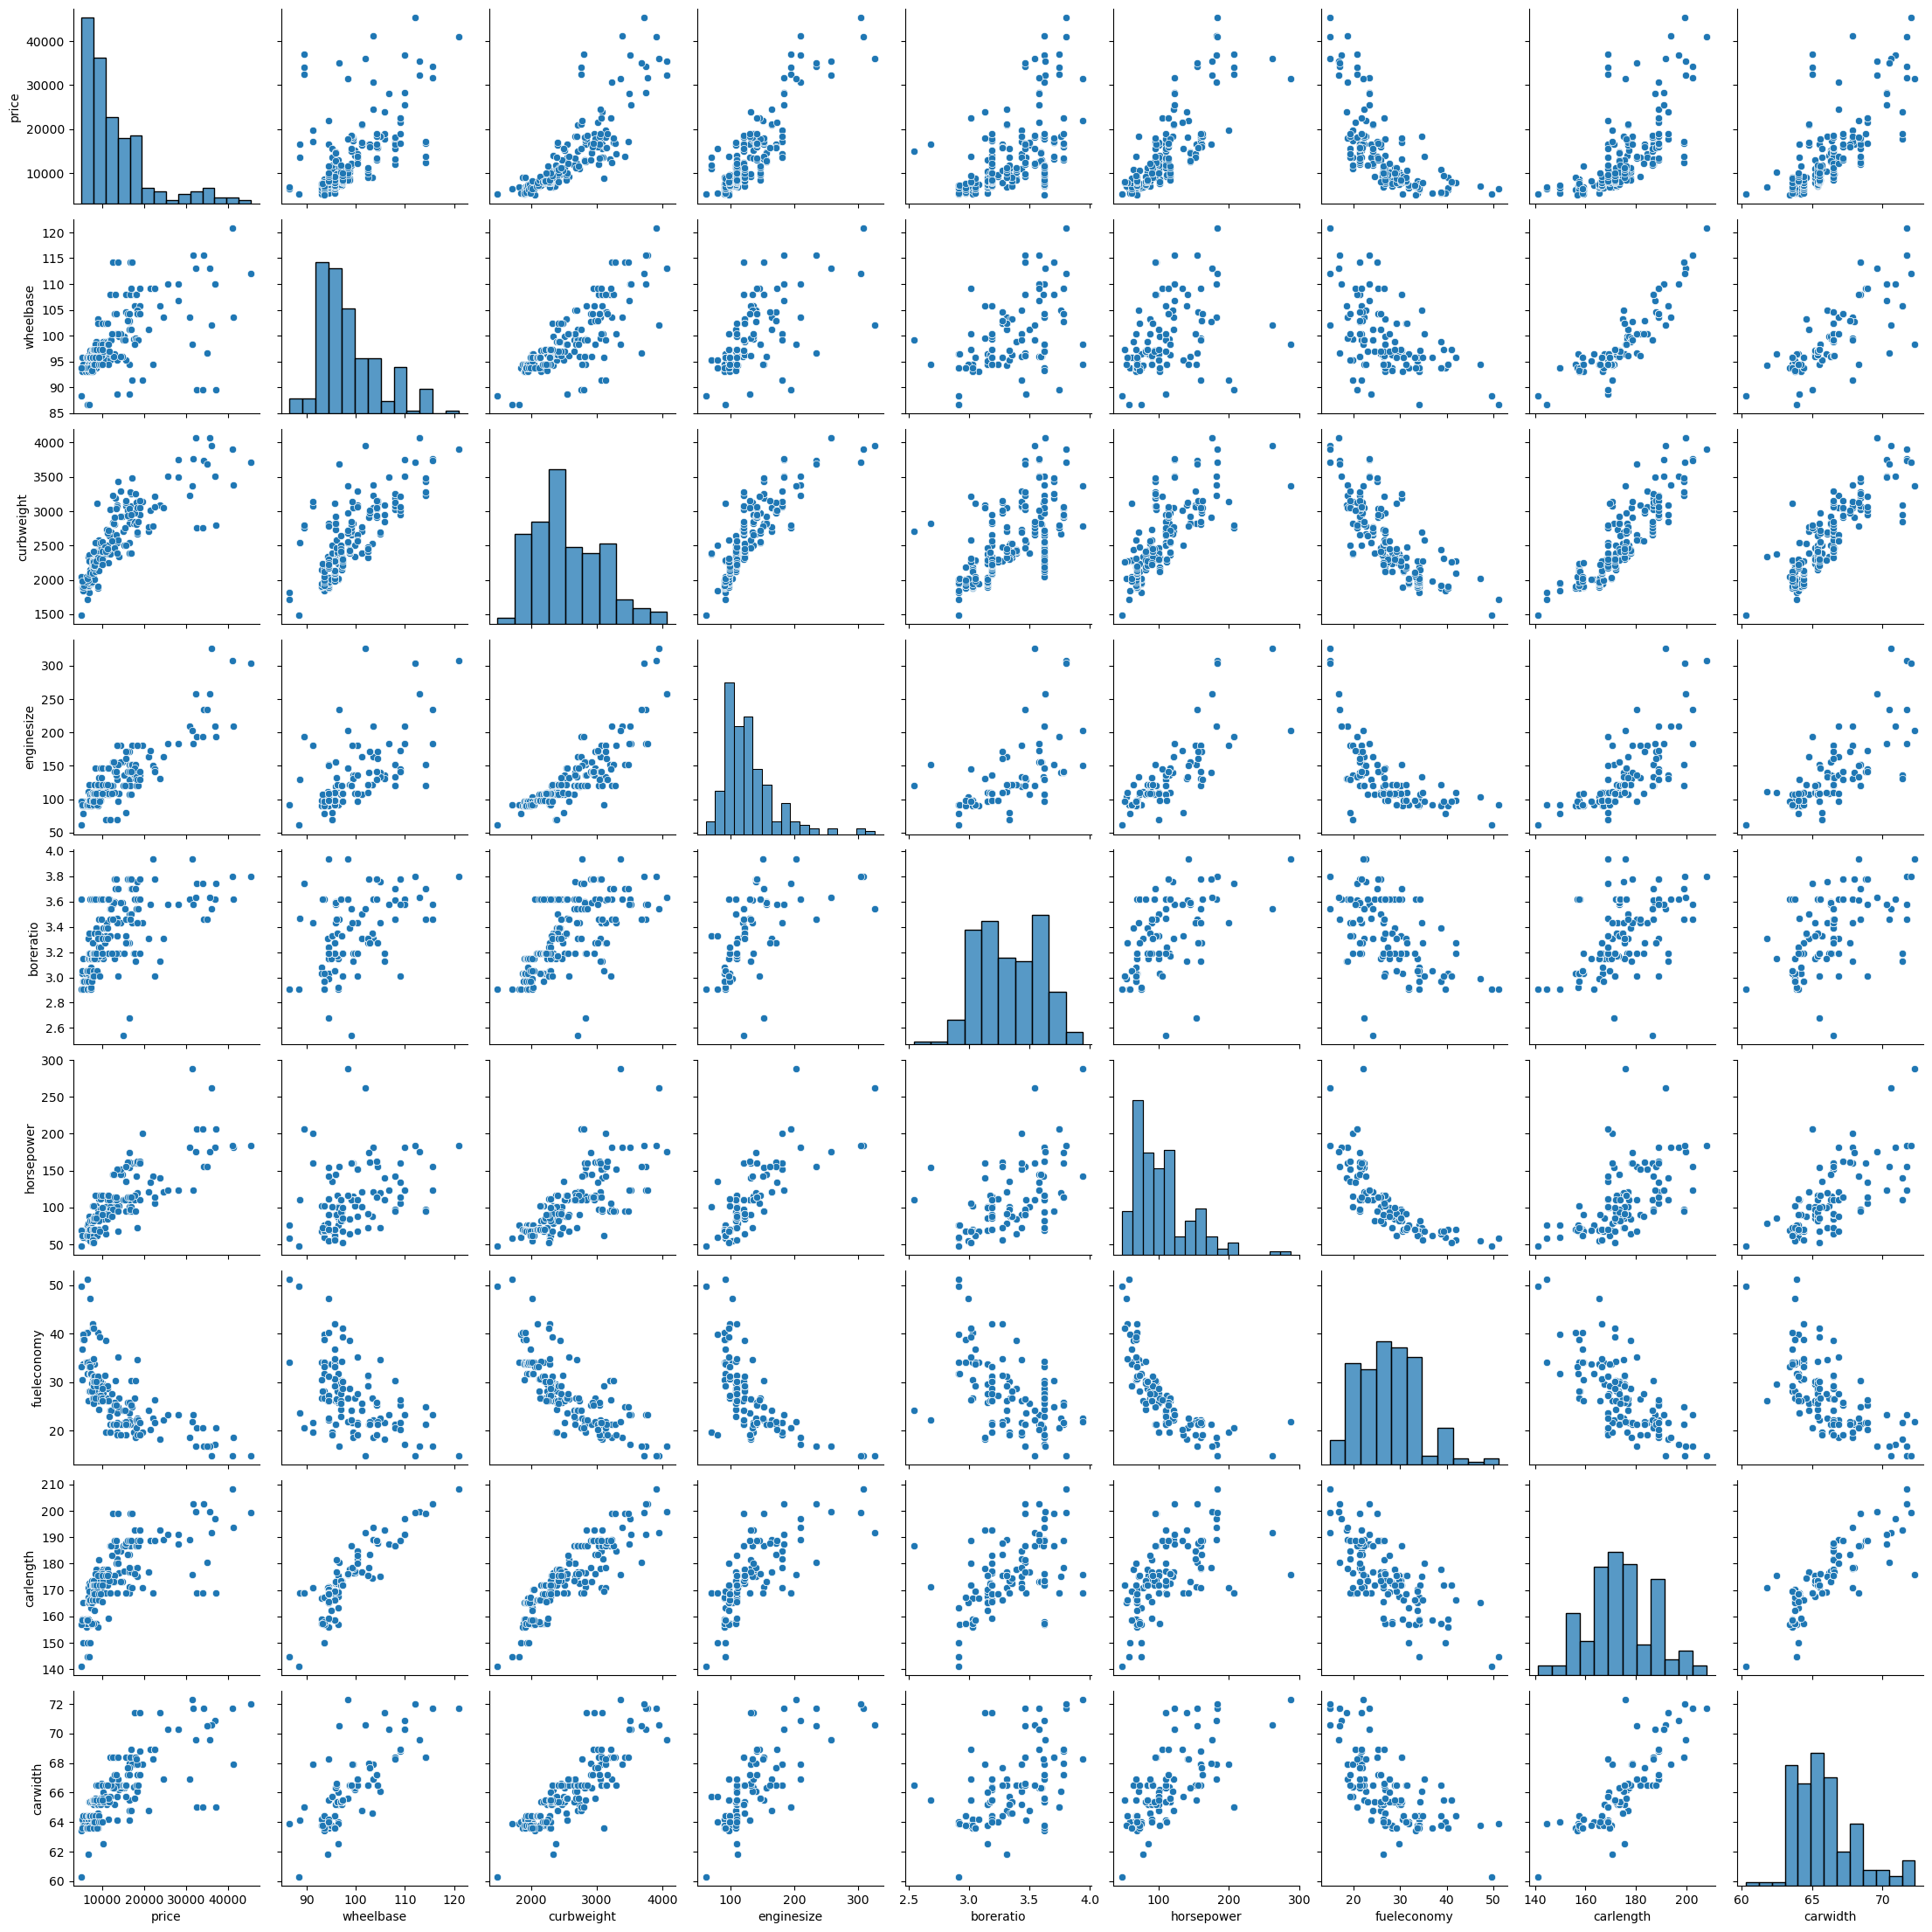

In [72]:
sns.pairplot(cars_lr)

### Step 6 : One Hot Encoding

In [73]:
cars_lr.select_dtypes('object')

fueltype aspiration      carbody drivewheel enginetype cylindernumber
0        gas        std  convertible        rwd       dohc           four
1        gas        std  convertible        rwd       dohc           four
2        gas        std    hatchback        rwd       ohcv            six
3        gas        std        sedan        fwd        ohc           four
4        gas        std        sedan        4wd        ohc           five
..       ...        ...          ...        ...        ...            ...
200      gas        std        sedan        rwd        ohc           four
201      gas      turbo        sedan        rwd        ohc           four
202      gas        std        sedan        rwd       ohcv            six
203   diesel      turbo        sedan        rwd        ohc            six
204      gas      turbo        sedan        rwd        ohc           four

[205 rows x 6 columns]

In [74]:
for c in cars_lr.select_dtypes('object'):
    print(cars_lr[c].value_counts())
    print("^"*70)

gas       185
diesel     20
Name: fueltype, dtype: int64
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
std      168
turbo     37
Name: aspiration, dtype: int64
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [75]:
cars_lr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   price           205 non-null    int32   
 1   fueltype        205 non-null    object  
 2   aspiration      205 non-null    object  
 3   carbody         205 non-null    object  
 4   drivewheel      205 non-null    object  
 5   wheelbase       205 non-null    float64 
 6   curbweight      205 non-null    int64   
 7   enginetype      205 non-null    object  
 8   cylindernumber  205 non-null    object  
 9   enginesize      205 non-null    int64   
 10  boreratio       205 non-null    float64 
 11  horsepower      205 non-null    int64   
 12  fueleconomy     205 non-null    float64 
 13  carlength       205 non-null    float64 
 14  carwidth        205 non-null    float64 
 15  carrange        205 non-null    category
dtypes: category(1), float64(5), int32(1), int64(3), object(6)
memo

In [76]:
cat_cols=cars_lr.select_dtypes(['object','category']).columns
cat_cols

Index(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype',
       'cylindernumber', 'carrange'],
      dtype='object')

In [77]:
num_vars=cars_lr.select_dtypes(exclude=['object','category']).columns
num_vars

Index(['price', 'wheelbase', 'curbweight', 'enginesize', 'boreratio',
       'horsepower', 'fueleconomy', 'carlength', 'carwidth'],
      dtype='object')

In [78]:
cars_lr=pd.get_dummies(data=cars_lr,columns=cat_cols,drop_first=True)
cars_lr

price  wheelbase  curbweight  enginesize  boreratio  horsepower  \
0    13495       88.6        2548         130       3.47         111   
1    16500       88.6        2548         130       3.47         111   
2    16500       94.5        2823         152       2.68         154   
3    13950       99.8        2337         109       3.19         102   
4    17450       99.4        2824         136       3.19         115   
..     ...        ...         ...         ...        ...         ...   
200  16845      109.1        2952         141       3.78         114   
201  19045      109.1        3049         141       3.78         160   
202  21485      109.1        3012         173       3.58         134   
203  22470      109.1        3217         145       3.01         106   
204  22625      109.1        3062         141       3.78         114   

     fueleconomy  carlength  carwidth  fueltype_gas  aspiration_turbo  \
0          23.70      168.8      64.1             1                 0   
1          23.70      168.8      64.1             1                 0   
2          22.15      171.2      65.5             1                 0   
3          26.70      176.6      66.2             1                 0   
4          19.80      176.6      66.4             1                 0   
..           ...        ...       ...           ...               ...   
200        25.25      188.8      68.9             1                 0   
201        21.70      188.8      68.8             1                 1   
202        20.25      188.8      68.9             1                 0   
203        26.45      188.8      68.9             0                 1   
204        21.70      188.8      68.9             1                 1   

     carbody_hardtop  carbody_hatchback  carbody_sedan  carbody_wagon  \
0                  0                  0              0              0   
1                  0                  0              0              0   
2                  0                  1              0              0   
3                  0                  0              1              0   
4                  0                  0              1              0   
..               ...                ...            ...            ...   
200                0                  0              1              0   
201                0                  0              1              0   
202                0                  0              1              0   
203                0                  0              1              0   
204                0                  0              1              0   

     drivewheel_fwd  drivewheel_rwd  enginetype_dohcv  enginetype_l  \
0                 0               1                 0             0   
1                 0               1                 0             0   
2                 0               1                 0             0   
3                 1               0                 0             0   
4                 0               0                 0             0   
..              ...             ...               ...           ...   
200               0               1                 0             0   
201               0               1                 0             0   
202               0               1                 0             0   
203               0               1                 0             0   
204               0               1                 0             0   

     enginetype_ohc  enginetype_ohcf  enginetype_ohcv  enginetype_rotor  \
0                 0                0                0                 0   
1                 0                0                0                 0   
2                 0                0                1                 0   
3                 1                0                0                 0   
4                 1                0                0                 0   
..              ...              ...              ...               ...   
200     

## Step 7 : train_Test_Split 

In [79]:
from sklearn.model_selection import train_test_split

df_train,df_test = train_test_split(
    cars_lr, test_size=0.3, random_state=100)

In [80]:
from sklearn.preprocessing import MinMaxScaler

In [81]:
scaler=MinMaxScaler()
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

**Checking correaltion**

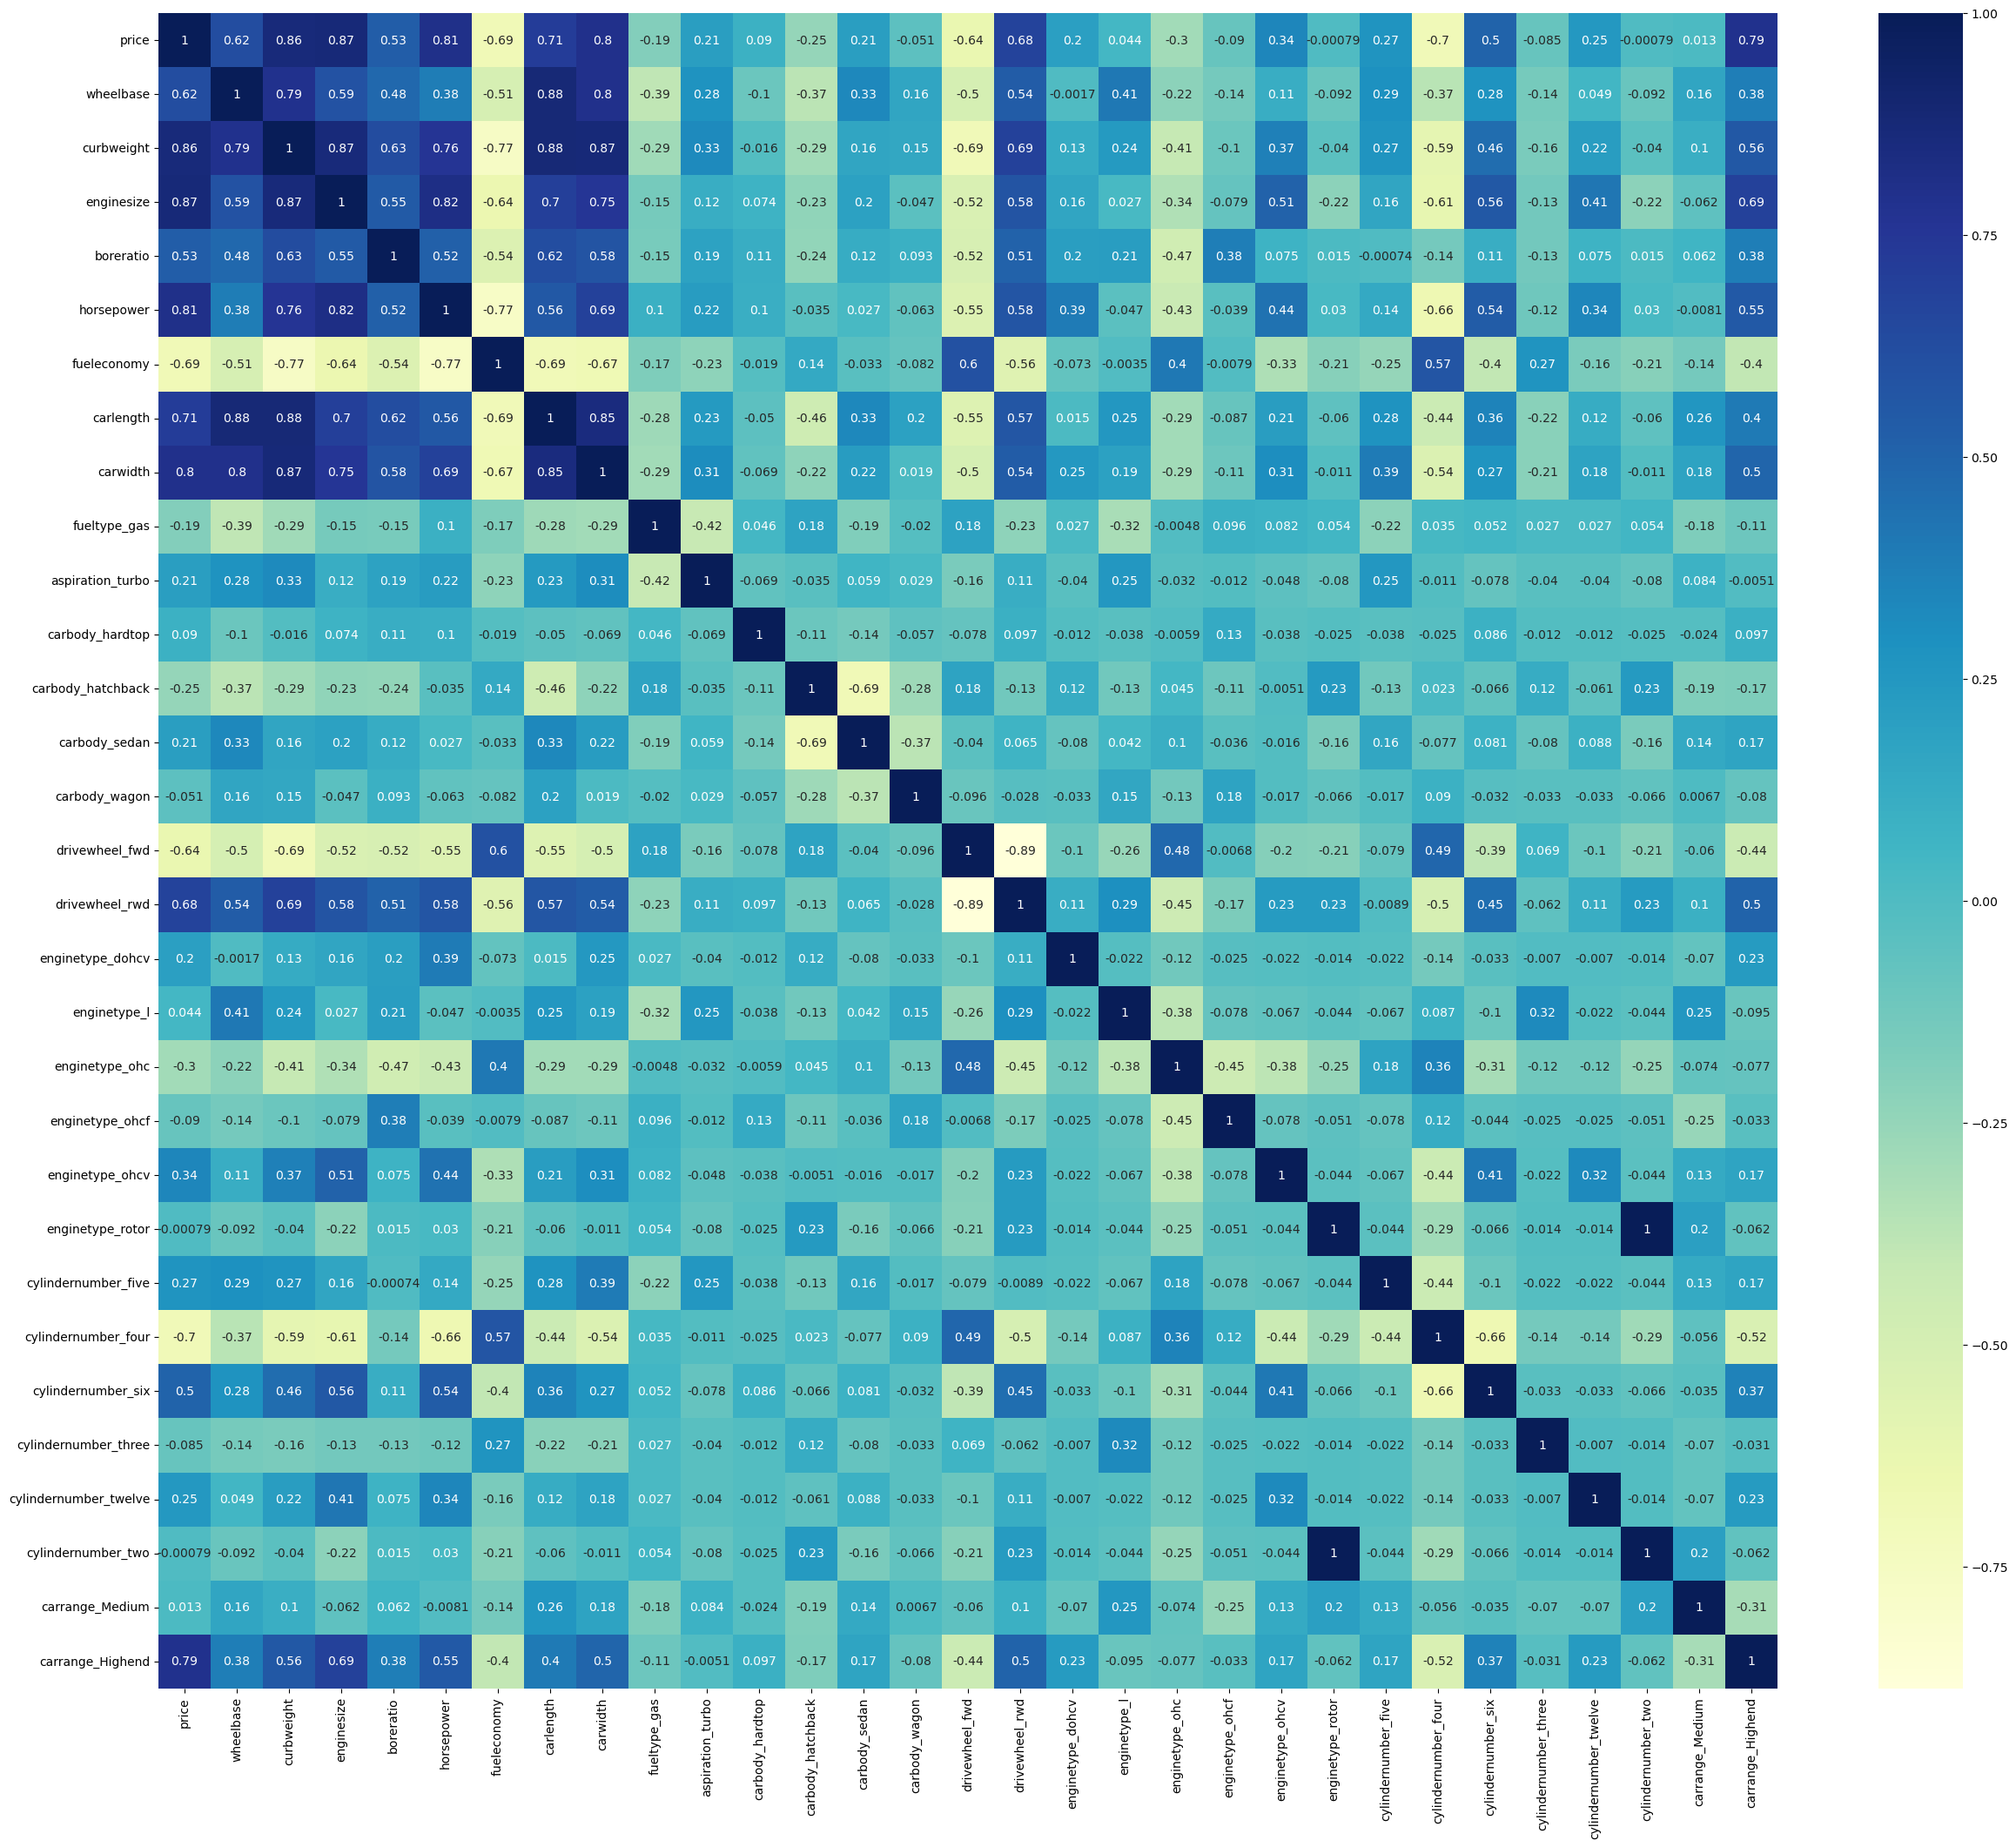

In [82]:
plt.figure(figsize=(30,25))
sns.heatmap(df_train.corr(),annot=True,cmap='YlGnBu');

**Very hard to interpret**

In [83]:
X_train = df_train.iloc[:,1:]
y_train = df_train['price']

In [84]:
X_train.shape, y_train.shape

((143, 30), (143,))

### Step 8 :Model Building

In [85]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [86]:
lr=LinearRegression()
rfe=RFE(estimator=lr,n_features_to_select=10).fit(X_train,y_train)
rfe

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [87]:
rfe.support_

array([False,  True, False, False,  True,  True, False,  True, False,
       False, False,  True,  True,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True])

In [88]:
rfe.ranking_

array([ 3,  1, 13, 10,  1,  1, 11,  1, 17, 18,  2,  1,  1,  1, 16, 15,  1,
       19,  7,  8,  9, 20,  6,  4,  5, 14,  1, 21, 12,  1])

In [89]:
X_train.iloc[:,rfe.support_]

curbweight  horsepower  fueleconomy  carwidth  carbody_hatchback  \
122    0.272692    0.083333     0.530864  0.291667                  0   
125    0.500388    0.395833     0.213992  0.666667                  1   
166    0.314973    0.266667     0.344307  0.308333                  1   
1      0.411171    0.262500     0.244170  0.316667                  0   
199    0.647401    0.475000     0.122085  0.575000                  0   
..          ...         ...          ...       ...                ...   
87     0.354926    0.283333     0.311385  0.425000                  0   
103    0.609775    0.433333     0.189300  0.516667                  0   
67     0.786268    0.312500     0.234568  0.833333                  0   
24     0.185803    0.083333     0.530864  0.291667                  1   
8      0.619860    0.383333     0.097394  0.925000                  0   

     carbody_sedan  carbody_wagon  enginetype_dohcv  cylindernumber_twelve  \
122              1              0                 0                      0   
125              0              0                 0                      0   
166              0              0                 0                      0   
1                0              0                 0                      0   
199              0              1                 0                      0   
..             ...            ...               ...                    ...   
87               1              0                 0                      0   
103              1              0                 0                      0   
67               1              0                 0                      0   
24               0              0                 0                      0   
8                1              0                 0                      0   

     carrange_Highend  
122                 0  
125                 1  
166                 0  
1                   0  
199                 0  
..                ...  
87                  0  
103                 0  
67                  1  
24                  0  
8                   0  

[143 rows x 10 columns]

In [90]:
X_train_rfe=X_train[X_train.columns[rfe.support_]]

In [91]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 3),
 ('curbweight', True, 1),
 ('enginesize', False, 13),
 ('boreratio', False, 10),
 ('horsepower', True, 1),
 ('fueleconomy', True, 1),
 ('carlength', False, 11),
 ('carwidth', True, 1),
 ('fueltype_gas', False, 17),
 ('aspiration_turbo', False, 18),
 ('carbody_hardtop', False, 2),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', False, 16),
 ('drivewheel_rwd', False, 15),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 19),
 ('enginetype_ohc', False, 7),
 ('enginetype_ohcf', False, 8),
 ('enginetype_ohcv', False, 9),
 ('enginetype_rotor', False, 20),
 ('cylindernumber_five', False, 6),
 ('cylindernumber_four', False, 4),
 ('cylindernumber_six', False, 5),
 ('cylindernumber_three', False, 14),
 ('cylindernumber_twelve', True, 1),
 ('cylindernumber_two', False, 21),
 ('carrange_Medium', False, 12),
 ('carrange_Highend', True, 1)]

In [92]:
X_train.columns[rfe.support_]

Index(['curbweight', 'horsepower', 'fueleconomy', 'carwidth',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon',
       'enginetype_dohcv', 'cylindernumber_twelve', 'carrange_Highend'],
      dtype='object')

**building model using statsmodel,for detailed statistics**

In [93]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [94]:
def build_model(X,y):
    X = sm.add_constant(X)
    lm = sm.OLS(y,X).fit()
    print(lm.summary())
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [95]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     172.1
Date:                Fri, 02 Jun 2023   Prob (F-statistic):           1.29e-70
Time:                        21:23:43   Log-Likelihood:                 205.85
No. Observations:                 143   AIC:                            -389.7
Df Residuals:                     132   BIC:                            -357.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.09

In [96]:
X_train_new = X_train_rfe.drop(["cylindernumber_twelve"], axis = 1)

In [97]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     187.9
Date:                Fri, 02 Jun 2023   Prob (F-statistic):           4.25e-71
Time:                        21:23:43   Log-Likelihood:                 204.17
No. Observations:                 143   AIC:                            -388.3
Df Residuals:                     133   BIC:                            -358.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0764      0.04

In [98]:
X_train_new = X_train_new.drop(["fueleconomy"], axis = 1)

In [99]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     209.5
Date:                Fri, 02 Jun 2023   Prob (F-statistic):           7.85e-72
Time:                        21:23:43   Log-Likelihood:                 203.07
No. Observations:                 143   AIC:                            -388.1
Df Residuals:                     134   BIC:                            -361.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0305      0.02

In [100]:
checkVIF(X_train_new)

Features    VIF
0              const  26.90
1         curbweight   8.10
5      carbody_sedan   6.07
4  carbody_hatchback   5.63
3           carwidth   5.14
2         horsepower   3.61
6      carbody_wagon   3.58
8   carrange_Highend   1.63
7   enginetype_dohcv   1.46

In [101]:
X_train_new = X_train_new.drop(["curbweight"], axis = 1)

In [102]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     215.9
Date:                Fri, 02 Jun 2023   Prob (F-statistic):           4.70e-70
Time:                        21:23:43   Log-Likelihood:                 195.77
No. Observations:                 143   AIC:                            -375.5
Df Residuals:                     135   BIC:                            -351.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0319      0.02

In [103]:
checkVIF(X_train_new)

Features    VIF
0              const  26.89
4      carbody_sedan   6.06
3  carbody_hatchback   5.54
5      carbody_wagon   3.47
1         horsepower   2.50
2           carwidth   2.22
7   carrange_Highend   1.56
6   enginetype_dohcv   1.21

In [104]:
X_train_new = X_train_new.drop(["carbody_sedan"], axis = 1)

In [105]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     237.6
Date:                Fri, 02 Jun 2023   Prob (F-statistic):           1.68e-69
Time:                        21:23:43   Log-Likelihood:                 191.46
No. Observations:                 143   AIC:                            -368.9
Df Residuals:                     136   BIC:                            -348.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0934      0.01

In [106]:
checkVIF(X_train_new)

Features    VIF
0              const  10.82
1         horsepower   2.39
2           carwidth   2.09
6   carrange_Highend   1.55
3  carbody_hatchback   1.23
5   enginetype_dohcv   1.21
4      carbody_wagon   1.11

dropping `wagon` because of high p-value.

In [107]:
X_train_new = X_train_new.drop(["carbody_wagon"], axis = 1)

In [108]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Fri, 02 Jun 2023   Prob (F-statistic):           1.57e-70
Time:                        21:23:43   Log-Likelihood:                 190.93
No. Observations:                 143   AIC:                            -369.9
Df Residuals:                     137   BIC:                            -352.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0970      0.01

In [109]:
checkVIF(X_train_new)

Features    VIF
0              const  10.39
1         horsepower   2.39
2           carwidth   2.08
5   carrange_Highend   1.53
4   enginetype_dohcv   1.21
3  carbody_hatchback   1.13

In [110]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

In [111]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Fri, 02 Jun 2023   Prob (F-statistic):           1.57e-70
Time:                        21:23:43   Log-Likelihood:                 190.93
No. Observations:                 143   AIC:                            -369.9
Df Residuals:                     137   BIC:                            -352.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0970      0.018     -5.530      0.000      -0.132      -0.062
horsepower            0.5013      0.051      9.832      0.000       0.401       0.602
carwidth              0.3952      0.043      9.252      0.000       0.311       0.480
carbody_hatchback    -0.0336      0.012     -2.764      0.006      -0.058      -0.010
enginetype_dohcv     -0.3231      0.072     -4.502      0.000      -0.465      -0.181
carrange_Highend      0.2833      0.021     13.615      0.000       0.242       0.324
==============================================================================
Omnibus:                       36.097   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.717
Skew:                           1.067   Prob(JB):                     8.07e-18
Kurtosis:                       5.943   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 0, 'Errors')

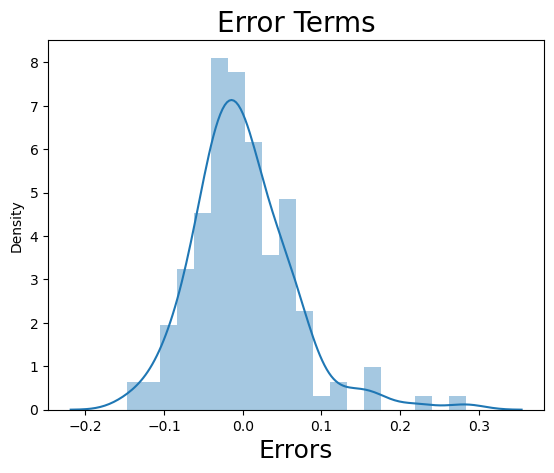

In [112]:

sns.distplot((y_train - y_train_price), bins = 20)
plt.title('Error Terms', fontsize = 20)  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

Error terms seem to be approximately normally distributed, so the assumption on the linear modeling seems to be fulfilled.

In [113]:
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio',
            'horsepower', 'fueleconomy', 'carlength', 'carwidth', 'price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [114]:
y_test = df_test.pop('price')
X_test = df_test

In [115]:
X_train_new = X_train_new.drop('const',axis=1)
X_test_new = X_test[X_train_new.columns]
X_test_new=sm.add_constant(X_test_new)

In [116]:
y_pred = lm.predict(X_test_new)

In [117]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8146387226353735

Text(0, 0.5, 'y_pred')

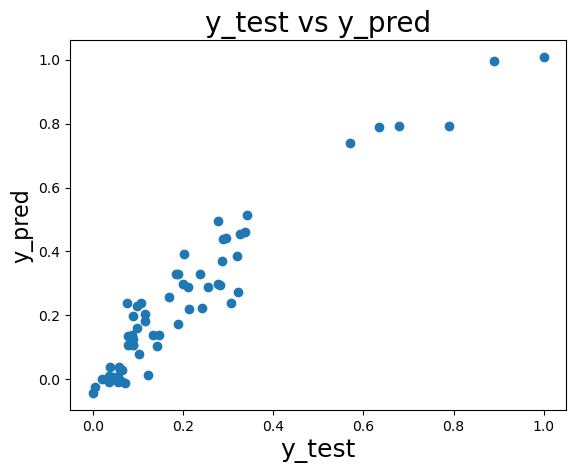

In [118]:
plt.scatter(y_test,y_pred)
plt.title('y_test vs y_pred', fontsize=20) 
plt.xlabel('y_test', fontsize=18)         
plt.ylabel('y_pred', fontsize=16)   

In [119]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Fri, 02 Jun 2023   Prob (F-statistic):           1.57e-70
Time:                        21:23:44   Log-Likelihood:                 190.93
No. Observations:                 143   AIC:                            -369.9
Df Residuals:                     137   BIC:                            -352.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0970      0.01

#### Inference :

1. *R-sqaured and Adjusted R-squared (extent of fit)* - 0.899 and 0.896 - `90%` variance explained.
2. *F-stats and Prob(F-stats) (overall model fit)* - 308.0 and 1.04e-67(approx. 0.0) - Model fir is significant and explained `90%` variance is just not by chance.
3. *p-values* - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the predictors are statistically significant.